#Initial

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/MyDrive/xAI for Social Bias


In [ ]:
!pip install lime
!pip install transformers

     |████████████████████████████████| 275 kB 5.1 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=164988a73448b953b7c181a37e72268039239f6a2e57d8586c8ebc42aff7409d
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 2.6 MB 5.2 MB/s 
     |████████████████████████████████| 895 kB 49.4 MB/s 
     |████████████████████████████████| 636 kB 46.8 MB/s 
     |████████████████████████████████| 3.3 MB 40.9 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[1]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[1]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [ ]:
import warnings
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
warnings.filterwarnings('ignore')

In [ ]:
print(len(mas))

280


#BERT Base

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
"""model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)"""

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
MODEL='cardiffnlp/twitter-roberta-base-sentiment'
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [ ]:
def predictor(texts):
    #print(len(texts))
    outputs = model(**tokenizer(texts, return_tensors="pt", padding=True))
    probas = F.softmax(outputs.logits).detach().numpy()
    return probas

In [ ]:
class_names=['Negative','Neutral','Positive']

In [ ]:
print(mas[:5])
print(fe[:5])
print(neu[:5])

['He feels ecstatic.\n', 'This man feels ecstatic.\n', 'This boy feels ecstatic.\n', 'My brother feels ecstatic.\n', 'My son feels ecstatic.\n']
['She feels ecstatic.\n', 'This woman feels ecstatic.\n', 'This girl feels ecstatic.\n', 'My sister feels ecstatic.\n', 'My daughter feels ecstatic.\n']
['They feel ecstatic.\n', 'This person feels ecstatic.\n', 'This child feels ecstatic.\n', 'My child feels ecstatic.\n', 'My sibling feels ecstatic.\n']


In [ ]:
masculine=['he', 'man','boy','brother','son', 'husband', 'boyfriend', 'father', 'him']
feminine=['she','woman','girl','sister','daughter','wife','girlfriend','mother', 'her']
neutral=['they', 'person', 'child', 'child', 'sibling', 'spouse', 'partner', 'parent', 'them']

In [ ]:
explainer = LimeTextExplainer(class_names=class_names)

exp = explainer.explain_instance("He is unhappy", predictor, num_features=15, num_samples=50, top_labels=3, distance_metric='cosine')
print(exp.predict_proba)
print(exp.show_in_notebook())
print(exp.as_list(label=0))
print(exp.as_list(label=1))
print(exp.as_list(label=2))
print(exp.as_list())

[0.85345966 0.13834113 0.00819926]


None
[('unhappy', 0.5115878959452802), ('He', -0.0899274925530734), ('is', -0.03243652880614638)]
[('unhappy', -0.33055118559170316), ('He', 0.03769745596139257), ('is', -0.018832649512483528)]
[('unhappy', -0.18103669281759346), ('He', 0.05223005001023855), ('is', 0.051269134847741225)]
[('unhappy', -0.33055118559170316), ('He', 0.03769745596139257), ('is', -0.018832649512483528)]


In [ ]:
explainer = LimeTextExplainer(class_names=class_names)

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0
avg_m_neg=0
avg_m_pos=0
avg_m_neu=0
avg_n_neg=0
avg_n_pos=0
avg_n_neu=0

confidence_m_neg=[]
confidence_m_pos=[]
confidence_m_neu=[]
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]
confidence_n_neg=[]
confidence_n_neu=[]
confidence_n_pos=[]

In [ ]:
for i in range(len(mas)):
  exp = explainer.explain_instance(mas[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  predictions=exp.predict_proba
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in masculine):
      avg_m_neg+=float(item[1])
      val=item[1]/predictions[0]
      confidence_m_neg.append(val)
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in masculine):
      avg_m_neu+=float(item[1])
      val=float(item[1])/float(predictions[1])
      confidence_m_neu.append(val)
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in masculine):
      avg_m_pos+=float(item[1])
      val=float(item[1])/float(predictions[2])
      confidence_m_pos.append(val)

print(confidence_m_pos)
print(confidence_m_neu)
print(confidence_m_neg)
print(avg_m_pos)
print(avg_m_neu)
print(avg_m_neg)

[-0.06661500433224721, -0.02241290973117993, -0.02608979334612502, -0.09013810408550413, 0.07282184774507648, -0.03570165818083247, 0.004404372143587002, -0.14969680132164825, -0.1836083434796173, -0.029402823025949393, 0.011771234237783392, -0.08685578378473294, -0.003542342862599979, -0.007381607413410553, -0.10700052802324304, -0.09403061708590357, -0.11735383143953208, -0.03911761548195564, -0.03791559695724022, -0.08332032627285653, -0.04117497251302053, -0.03260975932448598, -0.03179664942474688, -0.07324103174639683, -0.09774660115750342, -0.03878873449339193, 0.018698863570833297, -0.013347320899902327, -0.034879278184321426, -0.007613532280563264, -0.037343196838510596, -0.08283128647903515, -0.1104512747780338, -0.0007243443282867489, 0.008521946441803726, -0.11502638865004036, 0.002108741959143931, 0.0023959673827417343, -0.0498758517211476, -0.12334752290939095, -0.04174332640524866, 0.004911343447901876, 0.033612891311104835, -0.06895092308517854, 0.03962897221418937, -0.0

In [ ]:
print(confidence_m_pos)
print(confidence_m_neu)
print(confidence_m_neg)

[-0.06661500433224721, -0.02241290973117993, -0.02608979334612502, -0.09013810408550413, 0.07282184774507648, -0.03570165818083247, 0.004404372143587002, -0.14969680132164825, -0.1836083434796173, -0.029402823025949393, 0.011771234237783392, -0.08685578378473294, -0.003542342862599979, -0.007381607413410553, -0.10700052802324304, -0.09403061708590357, -0.11735383143953208, -0.03911761548195564, -0.03791559695724022, -0.08332032627285653, -0.04117497251302053, -0.03260975932448598, -0.03179664942474688, -0.07324103174639683, -0.09774660115750342, -0.03878873449339193, 0.018698863570833297, -0.013347320899902327, -0.034879278184321426, -0.007613532280563264, -0.037343196838510596, -0.08283128647903515, -0.1104512747780338, -0.0007243443282867489, 0.008521946441803726, -0.11502638865004036, 0.002108741959143931, 0.0023959673827417343, -0.0498758517211476, -0.12334752290939095, -0.04174332640524866, 0.004911343447901876, 0.033612891311104835, -0.06895092308517854, 0.03962897221418937, -0.0

In [ ]:
print(len(confidence_m_pos))
print(len(confidence_m_neu))
print(len(confidence_m_neg))

280
280
280


In [ ]:
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0

for i in range(len(fe)):
  exp = explainer.explain_instance(fe[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  predictions=exp.predict_proba
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in feminine):
      avg_f_neg+=float(item[1])
      val=float(item[1])/float(predictions[0])
      confidence_f_neg.append(val)
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in feminine):
      avg_f_neu+=float(item[1])
      val=float(item[1])/float(predictions[1])
      confidence_f_neu.append(val)
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in feminine):
      avg_f_pos+=float(item[1])
      val=float(item[1])/float(predictions[2])
      confidence_f_pos.append(val)

In [ ]:
print(confidence_f_pos)
print(confidence_f_neu)
print(confidence_f_neg)
print(avg_f_pos)
print(avg_f_neu)
print(avg_f_neg)
print(len(confidence_f_neu))
print(len(confidence_f_neg))
print(len(confidence_f_pos))

[-0.08846144095391366, -0.031042834478378287, -0.005705159925312557, -0.011253226376405965, -0.021247258593512848, -0.04691602207270215, -0.02101094276825011, -0.019209807963015618, -0.14907533971332573, -0.0677181705214492, -0.004976557562714509, -0.013593157894598449, -0.01510233888656542, -0.034212225905032735, -0.04254672203877428, -0.003916420180201536, -0.09438448592771072, -0.10908809140612977, 0.0011619260801013509, -0.03741762529263935, -0.030216348441698716, -0.043988126183190604, -0.08150128262897002, -0.10385873070053893, -0.11043691005465796, 0.009860540556027588, -0.03719661737964559, -0.053757985385388604, -0.014649006498614598, -0.05569869568870583, -0.04618419492936941, -0.04999706339741811, -0.09870285516004276, -0.0849361591304349, -0.026977804664313605, -0.08726775368300864, 0.001988694398321802, -0.028732355152620733, 0.011307112244073733, -0.08784107722206534, -0.09075437988249976, -0.09789558739791435, -0.051676460055202204, -0.002648564363845907, 0.0264286965727

In [ ]:
confidence_n_neg=[]
confidence_n_neu=[]
confidence_n_pos=[]

avg_n_neg=0
avg_n_pos=0
avg_n_neu=0
for i in range(len(neu)):
  exp = explainer.explain_instance(neu[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  predictions=exp.predict_proba
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in neutral):
      avg_n_neg+=float(item[1])
      val=float(item[1])/float(predictions[0])
      confidence_n_neg.append(val)
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in neutral):
      avg_n_neu+=float(item[1])
      val=float(item[1])/float(predictions[1])
      confidence_n_neu.append(val)
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in neutral):
      avg_n_pos+=float(item[1])
      val=float(item[1])/float(predictions[2])
      confidence_n_pos.append(val)

In [ ]:
print(confidence_n_pos)
print(confidence_n_neu)
print(confidence_n_neg)
print(avg_n_pos)
print(avg_n_neu)
print(avg_n_neg)

[-0.17347912816114577, -0.13498980103019106, -0.08579256784112957, 0.017809880154139698, -0.061676301590729087, -0.07307048919384436, -0.03525763462624138, -0.07697079756057522, -0.22570122082940774, -0.10916358207815079, -0.01787631308461631, -0.011054127735930206, -0.08106766690510779, -0.060736664364907655, -0.035516629073242593, -0.06157688985604713, -0.29886437859805676, -0.11879924284365327, -0.0770091218652906, -0.042433651919144964, -0.09902378184082997, -0.046504237814575425, -0.019910621524806753, -0.10163364864471627, -0.197425857181765, -0.08178013998266269, -0.05377355334524814, 0.03467803967143948, -0.075374621504411, -0.01892472476085733, -0.00926243041579376, -0.0878025091703315, -0.3093909195298993, -0.06557099125186573, -0.0018148735847615663, 0.041994774212850444, -0.048376229561582045, -0.03951909418009814, 0.018278716062445733, -0.03238990048051574, -0.09254500507274177, -0.05220728109800645, -0.07400851048298904, 0.013613344536155451, -0.040870622217840255, -0.054

In [15]:
confidence_n_pos=[-0.17347912816114577, -0.13498980103019106, -0.08579256784112957, 0.017809880154139698, -0.061676301590729087, -0.07307048919384436, -0.03525763462624138, -0.07697079756057522, -0.22570122082940774, -0.10916358207815079, -0.01787631308461631, -0.011054127735930206, -0.08106766690510779, -0.060736664364907655, -0.035516629073242593, -0.06157688985604713, -0.29886437859805676, -0.11879924284365327, -0.0770091218652906, -0.042433651919144964, -0.09902378184082997, -0.046504237814575425, -0.019910621524806753, -0.10163364864471627, -0.197425857181765, -0.08178013998266269, -0.05377355334524814, 0.03467803967143948, -0.075374621504411, -0.01892472476085733, -0.00926243041579376, -0.0878025091703315, -0.3093909195298993, -0.06557099125186573, -0.0018148735847615663, 0.041994774212850444, -0.048376229561582045, -0.03951909418009814, 0.018278716062445733, -0.03238990048051574, -0.09254500507274177, -0.05220728109800645, -0.07400851048298904, 0.013613344536155451, -0.040870622217840255, -0.05449285545576003, -0.010032284212936183, -0.048551398787353046, -0.14078748702076602, -0.0997838924555051, -0.05223770178014363, 0.03216145321645944, -0.07363066920995825, -0.04988708051943671, -0.02825667892019456, -0.04786544964357287, -0.11235396463994764, -0.043255431382111895, -0.05813482943140503, -0.04926402910903095, -0.056034439178936975, -0.016019229472373293, -0.01002277343029998, -0.013664758863146836, -0.06955791007586921, -0.054726334950918956, -0.08033927575034326, -0.05517764882008626, -0.04092799558223868, -0.03737120157155915, -0.04855710245678352, -0.04723821803690384, -0.2280905913846737, -0.0689126038849841, -0.0006759706716146736, -0.04229374900276022, -0.05964144617614927, -0.029632435283729053, -0.04894485839866378, 0.0043083488158062325, -0.08975659213888351, -0.018850370467407528, -0.07643568275412926, 0.016849590262193754, -0.010327414124912402, -0.019918532517476332, 0.029366194838406617, -0.0062612464807633005, -0.09252352015111796, -0.0005719607711990692, -0.009560096605983774, -0.017643521235399848, -0.029780550418753823, -0.02532864725250559, -0.015711993423379648, -0.03621934449510171, -0.08821546729091595, -0.03189725474842215, -0.02505628635601832, -0.05060317499418913, 0.02678031416201959, -0.0004273377161131965, 0.045964629598871834, -0.03916451390646144, -0.09476748083785168, -0.006665544014662922, -0.0601056370644776, -0.051732281359600445, -0.08159024752428222, -0.018273379993922235, -0.02521238448805131, -0.04154929827892515, -0.17285073047504979, 0.021036799735590438, -0.0011763345506248279, -0.037765934873422204, -0.06681458775958309, 0.010269521358574148, 0.08556195785720332, -0.03314030830343434, -0.02628865260118625, -0.03914892551032437, -0.023583563897501495, 0.0038669448578854434, -0.06029404244966473, -0.016600547624214493, 0.0164667161629871, -0.10282483452988372, -0.019467922332975413, -0.06476453660932255, -0.008373713054960803, -0.03259373533346182, -0.042632124378610345, -0.06305593461814277, -0.010641101546311432, -0.04922829425056708, -0.005622405444719339, -0.06429679006521129, -0.03421489441936082, -0.004056822818809862, -0.07242960485376837, -0.04398843942983821, 0.02180124582425448, -0.0437604460288352, -0.014532178454304535, -0.0429227193736701, -0.07248427505028773, -0.005540941589357685, -0.05407401144160092, -0.04577887334025276, 0.02341944160750999, -0.11995074367201705, -0.00971770399060922, -0.060103055624816486, -0.12601480677193067, -0.01587089074668264, -0.05902720861333647, 0.013674609906016162, 0.05659801568298584, -0.05250178564524809, 0.004446347910688, -0.02075685498170082, 0.004927238995101178, -0.01806367346153701, 0.016830822587591606, 0.022077578527495176, 0.027223963229705356, -0.03984016719516634, -0.1371358060826221, -0.08602360649567017, -0.35396005625428356, -0.02413510901866152, -0.10498315448409384, -0.08235606436191015, 0.016126894533791646, -0.21189594321640812, -0.029547694519450975, 0.022984368463083167, 0.021603394740648516, -0.01723593004460468, -0.015334622850777704, -0.009145748560775047, 0.05183117637164769, -0.049727985261718365, -0.029579276343116023, -0.024098607634698566, 0.009658597439072757, 0.06093030749020436, -0.07624087334174985, -0.07329340953678816, 0.09668155175266414, -0.0633338036995832, -0.023189561062655482, 0.03245801039860142, 0.007503301960440779, -0.002721260530136553, 0.03446898683148642, -0.014614395623804245, 0.037740915373534994, 0.030540366049331483, 0.03235771939315297, -0.025558565396384222, -0.006017826866194072, 0.06067237866315768, 0.035773021328320144, 0.023713768334476793, 0.04043502412268935, -0.033870521691680866, -0.10979408290464421, 0.018948297558061232, -0.019762267731877135, 0.016168161083073576, -0.12967114960922385, -0.010399762823641093, 0.015256404245364433, -0.13226344963508588, 0.038162757849973035, -0.021408090742455938, 0.014078425474632963, 0.020434749162806392, -0.05329998181295867, 0.026057706727709767, 0.06755627485737498, 0.03203892197115852, -0.053829478129410795, 0.0009531790528344207, 0.040556016046385465, 0.12000669911131917, 0.060717226186909744, 0.02319418788559189, 0.03082410541995794, -0.07572134434167761, 0.001721367624841556, 0.0014282687212803437, -0.018044872913505216, 0.061944307786148844, 0.027040251496235044, -0.02182442636750239, 0.007277460692452036, -0.02891690697492478, 0.002380707260514682, 0.039104504005233943, -0.04564266928140641, -0.022285727084968808, -0.02393149325164092, -0.0014848135721258265, 0.008911240104616235, 0.012501273759219153, 0.03142860474924685, 0.003097350018720864, 0.030721277560321787, 0.010740276903258333, 0.01730230600815854, 0.013027046299853923, 0.04067472620685776, -0.037705803448045916, 0.058986467582317785, 0.011784293574109234, -0.06562451282230769, -0.0008318076830204106, -0.012756749476884292, 0.030056629330431812, -0.012333415322927345, 0.046223991810606095, -0.0011714043273424, -0.014202925605632853, 0.05927295390148865, 0.003087972157671659, -0.02310282605777479, 0.03676916980921919, 0.05041387134254881, 0.02723636226288594, 0.04217848905685894, 0.04702497121323085, 0.00310992521054683, 0.017498663235861554, -0.038175906652794925, -0.013030648373481382, 0.02661217515013239, -0.0047488108605388225]
confidence_f_pos=[-0.08846144095391366, -0.031042834478378287, -0.005705159925312557, -0.011253226376405965, -0.021247258593512848, -0.04691602207270215, -0.02101094276825011, -0.019209807963015618, -0.14907533971332573, -0.0677181705214492, -0.004976557562714509, -0.013593157894598449, -0.01510233888656542, -0.034212225905032735, -0.04254672203877428, -0.003916420180201536, -0.09438448592771072, -0.10908809140612977, 0.0011619260801013509, -0.03741762529263935, -0.030216348441698716, -0.043988126183190604, -0.08150128262897002, -0.10385873070053893, -0.11043691005465796, 0.009860540556027588, -0.03719661737964559, -0.053757985385388604, -0.014649006498614598, -0.05569869568870583, -0.04618419492936941, -0.04999706339741811, -0.09870285516004276, -0.0849361591304349, -0.026977804664313605, -0.08726775368300864, 0.001988694398321802, -0.028732355152620733, 0.011307112244073733, -0.08784107722206534, -0.09075437988249976, -0.09789558739791435, -0.051676460055202204, -0.002648564363845907, 0.026428696572775405, -0.03323639452510637, -0.0331601300523497, -0.05145576611130633, -0.0703513152970676, -0.01113253617403343, -0.004290038389192373, -0.03507825745842845, 0.018811566387376674, -0.011820643760615288, 0.0014077885899510137, -0.032124307831070745, -0.057674161396581256, -0.09458083394419234, 0.011812340743165563, 0.00524363698705187, 0.003319526600076133, 0.007534708294024503, -0.04480958589151745, -0.07925237194076107, -0.09555353990628708, -0.07161410640073658, -0.049320088529097424, -0.04840334500754889, 0.013962923259076332, -0.031102182556961816, -0.01452024554032836, -0.050901457952831144, -0.07498470424210976, -0.09583190223892772, 0.015972283978957454, -0.03596911419732311, -0.0067314098030372945, -0.059176910723553945, -0.0008991383095252576, -0.015954150071486855, -0.06993263444285923, -0.053240402139967724, 0.005495636376627165, -0.008860462385860428, 0.011101976449051768, -0.012434594811379623, -0.04747170647858756, -0.13432259647261452, -0.060073152663899745, -0.01212470021211199, 0.05165930704874181, -0.039602141291935074, 0.02508222923851673, 0.011469177728230787, -0.04626353605716852, -0.10599976573459492, -0.07543031299579382, -0.007971926767112838, -0.05535410975507241, -0.015448265555451002, -0.03132453879737374, 0.008357381615905256, -0.02980975190778828, -0.05473983997563101, -0.08078365808248171, 0.0068757402152202765, 0.013026135451240255, -0.06596553684839437, -0.0007229781557874505, -0.0200176149605478, -0.026947921737288744, -0.031181076183198018, -0.1119156753705035, -0.047047852513183365, -0.008835641077586064, -0.04335573204202361, 0.01962963828267044, -0.001143003263200731, -0.020653103664587107, -0.08378328069870326, 0.014320670297832577, 0.05298285279170996, 0.058576302899106876, -0.038543923880303685, 0.038718517067394514, 0.040780076798901006, -0.033868423424249124, -0.06402162660438127, 0.04794671305301958, 0.010444059876517392, 0.05283070766318983, -0.035597673389088376, -0.003016123316408104, 0.015487621223477825, -0.012395033165808093, -0.051395197072484224, 0.04381879013328357, 0.017684908132016865, 0.0838714788143091, -0.01442739179850658, -0.01478247819689704, 0.02760521268836387, -0.035029537690171815, -0.06526572002973263, 0.006760578386058761, 0.0344294599228725, 0.0596654130971391, -0.03402661996083908, 0.015137040373777591, 0.020167520560906614, 0.05650968726151573, -0.06918538161626153, 0.08912344230636429, -0.018452412439010815, 0.09243050500679265, -0.05323681094112815, 0.048762169198912596, 0.03434616168960124, -0.05670335440129168, 0.051612275989675785, 0.03655352812964181, 0.01682997062071246, 0.024999578240457714, -0.025996683883220045, -0.013128400254371161, -0.039303698061830775, 0.004582072132710384, 0.00615906549359103, 0.007699668563401825, -0.11072203528279081, 0.051748512920158835, -0.36588155264878003, -0.025972072131928026, -0.13764058066591559, -0.10297666890978338, -0.15570873933873566, 0.03175479733363532, 0.11398294420378917, 0.10680702198340833, 0.020426459439584998, 0.043199214803120035, -0.0076001730244260185, -0.04812892940453402, -0.014208399332293491, -0.07356659066071838, 0.08410148962440907, 0.04491934600423259, -0.05818265768417977, 0.01322024469303069, 0.015647311001091558, -0.11434778449639013, -0.18166387591119507, 0.004881772185525366, 0.00027896971586319886, 0.061025337756591434, 0.014512965477104319, 0.04416974168810192, 0.034595065764032054, -0.01953628419198168, -0.020356993335839943, 0.004143422203826723, 0.02931132927238684, 0.05029813717499096, -0.0012282135522428696, 0.03235490044464078, 0.008167531302757448, 0.051922441497322974, -0.02687021972428089, -0.008687898399183725, 0.05609995404724088, 0.05201410206312597, -0.0026076307738841405, 0.07866324171996027, 0.09963163459107686, 0.08600719743300703, -0.22094303075435914, 0.12052820060692185, -0.006221883995807982, 0.046086275184315594, -0.000778922346337548, 0.0804575691481066, -0.0023066369932125755, 0.05058812914992953, -0.049842921729105406, 0.02744831972669214, 0.0042762551952520425, 0.026801891773805018, 0.05019153461145306, 0.06454344855142383, -0.005454026527440358, 0.019634713269060713, -0.019825372390955876, 0.00707268322177669, 0.0021540293349357705, 0.019868190793368858, -0.004251017571135068, 0.0734967061706502, 0.05554373841092965, 0.0737312894146979, -0.012729233410716622, 0.020418661953137605, -0.019666639499135743, 0.010652195908593367, 0.04420834469869697, 0.028052085370763317, -0.006195314066159269, 0.017548166591008767, 0.0158236666623202, 0.038496054083478816, -0.013458115790939916, 0.08115111691089427, 0.03305751289758616, 0.07031544762625996, 0.14897750918985436, 0.0814595092471562, 0.04459855080471208, 0.046114307285448165, 0.032901717448573904, -0.017876310784363122, 0.0069247515108671375, -0.0005290911846166334, 0.008179876897539583, 0.00737071686662699, 0.005059346800530493, -0.02220161459894138, 0.016831775350225633, 0.03527712710296678, 0.05026615576632284, 0.04457752561353044, 0.0778996395762093, 0.009360381217093983, 0.0026362466765547845, 0.04793244183647221, -0.03019090271029775, 0.06047996938139553, 0.0348043651895485, 0.0368156549915992, -0.0045280763517938204, -0.0050373181384736065, -0.0015637731467240672]
confidence_m_pos=[-0.06661500433224721, -0.02241290973117993, -0.02608979334612502, -0.09013810408550413, 0.07282184774507648, -0.03570165818083247, 0.004404372143587002, -0.14969680132164825, -0.1836083434796173, -0.029402823025949393, 0.011771234237783392, -0.08685578378473294, -0.003542342862599979, -0.007381607413410553, -0.10700052802324304, -0.09403061708590357, -0.11735383143953208, -0.03911761548195564, -0.03791559695724022, -0.08332032627285653, -0.04117497251302053, -0.03260975932448598, -0.03179664942474688, -0.07324103174639683, -0.09774660115750342, -0.03878873449339193, 0.018698863570833297, -0.013347320899902327, -0.034879278184321426, -0.007613532280563264, -0.037343196838510596, -0.08283128647903515, -0.1104512747780338, -0.0007243443282867489, 0.008521946441803726, -0.11502638865004036, 0.002108741959143931, 0.0023959673827417343, -0.0498758517211476, -0.12334752290939095, -0.04174332640524866, 0.004911343447901876, 0.033612891311104835, -0.06895092308517854, 0.03962897221418937, -0.06492343308220701, -0.026814285279110686, -0.043155649852039825, -0.10049178795126415, -0.0010634368544368362, 0.06631067682009316, -0.009870493864019092, 0.03550741192850021, 0.04191951447085615, -0.016283697743246183, -0.06975234175918829, -0.14603388216142718, 0.010010496239591021, 0.0010143636484162373, -0.052803035244066876, 0.005134077854652146, -0.004440266703544375, -0.00721290210359144, 0.01348575625653258, -0.07822212578183817, -0.06327676156969153, 0.0177410373832293, -0.03969288427488166, -0.00452645787942702, 0.030269177100955773, -0.053429338491756975, -0.05820676876972444, -0.058225159255153404, -0.024689120317191247, -0.016312363292912226, -0.06694127545274654, 0.03919603014052795, -0.020531832722340635, -0.056427825081631335, -0.05146551801526388, -0.09936904221074232, 0.05414351186762784, 0.017101202366332318, -0.04007576287762872, 0.013100687015516798, -0.04988631048023981, -0.08473024852451853, -0.09282603879662671, -0.07612099408879999, 0.020601722717706276, 0.039549074479512836, -0.04120536160073942, -0.023610290770790673, 0.030435812714933667, -0.039040606607914446, -0.11278828940770899, -0.08397562494654542, -0.05303857491971012, 0.04370201686115918, -0.05232408666756937, 0.002798833065543583, 0.0008948036986485345, -0.030902915584239233, -0.07930462369780142, -0.04678916703489147, -0.016508539852344378, -0.02537553904998482, -0.0033443707159049596, 0.05446757888677486, 0.008299065359110996, -0.05670393156492525, -0.003324565090906262, -0.011960632552340773, -0.006318531779106781, -0.006137199270674417, -0.040682086613010725, 0.049427898220403624, 0.02546379295858927, -0.05480919486662899, -0.06176954330958379, 0.025429572546361474, -0.002097772951822843, 0.006635477009272263, -0.061338154959390365, 0.07780355445019561, -0.013913599085056957, 0.0344073622727301, -0.0772930632097687, 0.007997326610166978, 0.02695942388995315, 0.05013430399072139, -0.000519188278163618, 0.07749588285559154, 0.014781041048108163, 0.023790583241675288, -0.05046987925458156, 0.005783451733849719, 0.0510252683026495, 0.05777026713592836, -0.08243149673206727, 0.024693489440803965, 0.037893791064788795, 0.0057491174210515545, -0.08933846602302545, 0.039326663162208404, 0.044148958102593214, 0.10158560963223684, -0.010664240306555111, 0.005928484687866964, 0.008440720938062205, -0.016873268334078925, -0.07619608782018422, 0.0699717801138853, 0.04376644038828884, 0.055449959587109375, -0.06509282258311394, -0.012684334084329282, 0.06576259234965616, 0.023110775142995747, -0.11901344878769395, -0.007572704446123239, 0.005911799907220217, 0.036371968722740004, 0.027889514390319805, 0.04768996946294711, 0.03754031418388219, 0.03823906629991247, -0.027197146042520097, 0.048954098306285776, 0.03434480586122409, -0.0428633396547032, -0.12153391947616796, -0.040967609843474, -0.03740351135744862, -0.17493560873625796, -0.27085339075294673, -0.01131064124133561, 0.016918384142815063, 0.07230569198456911, -0.068715789011079, 0.0127311960656519, 0.0013099018838114245, 0.046699750423317914, -0.09932582125198446, 0.04854335730541367, 0.08371634720373429, 0.07060024555535258, -0.008406286754818984, 0.019052222068573266, -0.008872523223506361, 0.006585921085370455, -0.07487910336397817, -0.01735269658532019, 0.034262265509158, 0.054053932353098716, 0.03598345703921214, 0.010777166921368445, 0.03571101929239918, 0.015388712447732706, -0.04278568849655412, -0.012113544240696049, 0.016304911828234504, 0.020172582291075103, 0.05520103954125493, 0.040789188596052926, -0.013818686555965416, -0.0016270455954819328, -0.021917240542941405, 0.06244031644661018, 0.12457282032489957, 0.07170530396209118, -0.04749942717814672, 0.129449831433279, 0.019579718648531353, 0.09027652667276019, -0.009010109809566102, 0.02313175587667283, 0.01879387385363745, 0.0889323606454634, -0.01300957004135817, 0.034692803221950584, 0.04868015833621675, 0.04846701059010043, -0.0948817765393706, 0.06351133620263771, 0.05230252337049655, 0.1354846295155768, 0.03618339234166468, 0.05555665100158488, 0.03434436159747405, 0.06397032987223251, -0.046804537059471414, 0.030086627935695342, 0.04934256927944174, 0.05371638982217869, 0.004198743338916062, 0.0004952116479081201, 0.05342839299548411, -0.0026340378522991966, -0.0025487276164400476, 0.01370846923828668, -0.01937750378333616, 0.03692052217773978, -0.04060841522915794, -0.013889158602490787, -0.014531094549710565, 0.03463759938466374, -0.010646494568264142, 0.05173747849497259, 0.0276352718171724, 0.047289929302334444, 0.02304714982585202, 0.07729487320959415, 0.054622044084798684, 0.1162812436978777, -0.04608091688371733, 0.011854206412704238, -0.04681419030978861, 0.03399192233325667, -0.02002784780383843, 0.0017490512299484107, -0.015710148144284015, -0.010627390517476144, -0.005650527467336673, 0.07445046451334202, 0.062161022797358745, 0.045610841556807884, 0.025011113038703386, 0.03224249979663781, 0.04089625796351659, 0.039503385386936755, 0.017779792816826363, 0.005735581878017312, 0.09386770883003412, 0.057991139741333256, 0.05012354288492667, 0.0009705635655593352, 0.023928721524085955, 0.01042988631058171, -0.025854740415389713]

In [16]:
confidence_m_pos=[i for i in confidence_m_pos if i>0]
confidence_f_pos=[i for i in confidence_f_pos if i>0]
confidence_n_pos=[i for i in confidence_n_pos if i>0]
print(len(confidence_m_pos))
print(len(confidence_f_pos))
print(len(confidence_n_pos))

140
125
87


In [ ]:
print(confidence_n_pos)
print(confidence_f_pos)
print(confidence_m_pos)

[-0.17347912816114577, -0.13498980103019106, -0.08579256784112957, 0.017809880154139698, -0.061676301590729087, -0.07307048919384436, -0.03525763462624138, -0.07697079756057522, -0.22570122082940774, -0.10916358207815079, -0.01787631308461631, -0.011054127735930206, -0.08106766690510779, -0.060736664364907655, -0.035516629073242593, -0.06157688985604713, -0.29886437859805676, -0.11879924284365327, -0.0770091218652906, -0.042433651919144964, -0.09902378184082997, -0.046504237814575425, -0.019910621524806753, -0.10163364864471627, -0.197425857181765, -0.08178013998266269, -0.05377355334524814, 0.03467803967143948, -0.075374621504411, -0.01892472476085733, -0.00926243041579376, -0.0878025091703315, -0.3093909195298993, -0.06557099125186573, -0.0018148735847615663, 0.041994774212850444, -0.048376229561582045, -0.03951909418009814, 0.018278716062445733, -0.03238990048051574, -0.09254500507274177, -0.05220728109800645, -0.07400851048298904, 0.013613344536155451, -0.040870622217840255, -0.054

In [ ]:
print(len(confidence_f_neg))
print(len(confidence_m_neg))
print(len(confidence_n_neg))
print()
print(len([i for i in confidence_m_pos if i>0]))
print(len([i for i in confidence_f_pos if i>0]))
print(len([i for i in confidence_n_pos if i>0]))
print(len([i for i in confidence_m_pos if i<0]))
print(len([i for i in confidence_f_pos if i<0]))
print(len([i for i in confidence_n_pos if i<0]))

print(len([i for i in confidence_m_pos if i>0.1]))
print(len([i for i in confidence_f_pos if i>0.1]))
print(len([i for i in confidence_n_pos if i>0.1]))
print(len([i for i in confidence_m_pos if i>0.05]))
print(len([i for i in confidence_f_pos if i>0.05]))
print(len([i for i in confidence_n_pos if i>0.05]))

280
280
280

140
125
87
140
155
193
5
4
1
40
37
13


In [ ]:
confidence_m_pos=[i for i in confidence_m_pos if i>0]
confidence_f_pos=[i for i in confidence_f_pos if i>0]
confidence_n_pos=[i for i in confidence_n_pos if i>0]

#Anger

In [ ]:
"""confidence_m_pos=[0.00249536118943035, 0.015745384362142217, 0.043759721615582226, -0.011738972535468857, 0.004249863140430531, 0.007971122725831966, 0.0047603932214843195, -0.015062751204456012, -0.0006042714910265272, 0.02626091200579516, 0.036249347061000775, -0.006763196407363256, -0.002915605687556439, 0.0034196489148169726, -0.003917083779580064, -0.009098292754452892, 0.004005145302856747, -0.012652805196041953, 0.04318390227574779, -0.008310344690331593, -0.003439380182846295, -0.0015142385801384993, -0.0037482386291708128, -0.01575439261910427, -0.002381341684441221, -0.017042440794723765, 0.020403149024710937, -0.019781111414294682, -0.009089349031079516, -0.008083164140012875, -0.00501765419132443, -0.027336600243220318, 8.78996320459274e-05, 0.014287899141111941, 0.04017597585487841, -0.007347109876305118, 0.005377663338136284, 0.001978621509165025, -0.0010182641925682312, -0.011495606946896364, -0.02250128525014542, 0.001012141155929559, 0.027859914592729167, 0.001999335669988015, -0.02504857359687414, -0.0041718481387737465, -0.007394927343587299, -0.0064960882061392364, -0.0023024693188000767, -0.011649553299211638, 0.009849934354418723, -0.001193655176022497, 0.009398788007005549, 0.06098428072110991, -0.021682827356119642, -0.025833279768019198, -0.027782757167825262, -0.013753568963864208, 0.02309166302037934, -0.008053355668305328, 0.0014956037105079377, -0.015965160002619605, -0.003661703546661022, -0.027859055692830953, 0.00439767252150608, -0.0009771061776943741, 0.010298221067534632, 0.0015171481688312086, 0.00344988250666992, 0.006681065654460425, -0.01351953959715877, -0.0020530366572454185, -0.00436075841908764, 0.006534129578076592, 0.004979481366275472, -0.009893688007463658, 0.0038489198106157296, 0.024871530482808473, -0.014936340882337537, -0.0006122735871696796, -0.026257606010016126, 0.0028006947732050038, 0.02887720875172054, 0.008181588697392238, 0.03730836446534425, 0.006603893832394249, -0.010954534685666144, -0.05277840096360065, 0.018025385887350438, 0.009441618956942502, 0.011073241359698326, 0.002526103203951523, -0.004043375766048048, 0.01703577973762708, -0.04919997933051488, -0.0291256564209635, -0.045966148395590635, 0.029148103776653087, 0.01925385216822253, -0.007093517848182524, 0.062458181933580575, 0.0325738447693396, -0.016951591235230434, -0.04403152016248316, -0.00791499868686421, -0.00046041285446528395, -0.0016290468319982107, 0.013705588012722817, -0.007163313415941712, -0.033313159670143526, 0.015682882106489316, -0.07227975613696777, -0.03596974410356481, 0.008847513910236644, 0.012508746918937752, -0.03187071920988654, 0.013733248419309684, 0.051566331401642254, -0.07344148553059396, -0.0405650714546973, 0.08830952552060423, 0.05156815132369739, 0.04400131008634298, -0.008242894647505574, 0.03514778407736092, 0.007175505792425708, 0.0062790204531187775, -0.07909038137659712, 0.044618093824207165, 0.03345384251639689, 0.07382382650921605, -0.024854937622285855, 0.038972341153904765, -0.0007615427497347319, 0.0015708105334805065, -0.05556036377634226, 0.03390825794288135, 0.042078314917147384, 0.017457220376355255, -0.02181744715197877, 0.01125103438038654, -0.005285226189772267, -0.023005031248521723, -0.048634359431321765, 0.03753135713879874, 0.022236084034872625, 0.07013478991444322, -0.04012931569431483, 0.05991804096229045, 0.007512819581984359, 0.01878517622341532, -0.041583520564027684, 0.03652635048522898, 0.002381790605364803, 0.00959472596613283, -0.0595167958327239, 0.015692228764528752, -0.017924788065781704, 0.006224355566348857, -0.0452887826074212, -0.0010844990261395064, 0.013058709223057323, 0.014078039449324268, -0.0086403200947689, -0.00821598009320612, -0.004017658047619927, -0.021227048323196513, -0.030945619027952148, -0.0007563587908394011, -0.007380425230599893, -0.00611702548796782, -0.007411484965188135, -0.011043761237275851, -0.024599848786346322, -0.0030904017600921698, -0.035680954230153626, 0.001408638962375887, -0.019171626603831246, -0.0008851742922318347, -0.014708986991095626, -0.008378667580136787, -0.008674022321706621, -0.00528530121964934, -0.011765107148822769, -0.010121675769423471, -0.0008257407539012218, 0.018872371084599566, -0.02007005999615645, -0.022811446880694742, -0.0070831242580948394, -0.007467083282788809, -0.025815823643288868, 0.0021555132655045298, -0.009186488295936454, -0.002033446926187271, -0.011985856932524462, -0.008860012213941466, -0.013412918277420145, -0.017676081871008567, -0.031148411693594794, 0.007498652077915995, -0.00392273150022373, 0.004925333905273571, -0.007251142619602042, 0.00036728542019809764, 0.001241923921855252, 0.004546940595319558, -0.008735463819857453, 0.004403731333186178, 0.0038111364029923414, -0.0038538885218013415, -0.0013034914472787058, 0.0035879478311888267, 0.00817127074463402, 0.0061370474287871365, -0.0038825439050647137, 0.004066120365694298, 0.004396975659909036, 0.006436678311202042, -0.009002396451694856, 0.005039623295038716, 0.004255398307783623, 0.006487858541989714, -0.008040624142736126, 0.009131664790293108, 0.009858051025616066, 0.03232521025137984, 0.00034015896159773153, 0.00880671962039101, 0.0040732665551441805, 0.021829138996452543, -0.004959055114154226, 0.010997588256243257, 0.0008435768403296991, 0.009267403643990329, -0.006245926627638195, 0.005222560492571809, 0.016549654286591435, 0.030642957000721782, -0.007625921309715557, 0.005991844129625141, 0.005861314371042522, 0.02051919752524616, 0.0011501585587463461, 0.004040704322056369, 0.014872316802128966, -0.0001310340555273947, -0.012427471308009587, 0.0041580905834989615, -0.00574751017600638, 0.009350295978597892, -0.002851448177973855, 0.015695033542867748, -0.0006519463647705588, -0.01106864774556509, -0.004641609298856369, 0.0035474975775072353, 0.007920348473979233, 0.01762398386296888, 0.002565787489697931, -0.004601565044021173, 0.004443312423828838, -0.0032331521405208064, -0.0011500804605683193, 0.006757169608215601, -0.005413682793536558, 0.009465801048873883, -0.011081505903374, 0.003211395437299668, -0.00023079869341057995, -0.0020328514285502634, -0.016421396531522504, 0.011790680318164293, 0.008985021482138308, 0.019075647996173516, -0.014191708167105882, -0.0014679302263881015, -0.005468319999174121, 0.002994945779375373, -0.01254952546011936]
confidence_m_neu=[0.10333188394208047, -0.0011873516066450672, 0.005878154233852787, 0.08132159600065751, 0.0680323096851836, 0.08954819829945411, 0.09106446231764863, 0.07954754762755482, 0.10586111683666333, 0.00893217923010962, 0.03631142130433841, 0.07375779829775796, 0.03653808295221769, 0.05905628583943967, 0.029300550937229188, 0.07715760584480147, 0.08465530557498037, -0.03821346618271678, 0.02867949395040148, 0.10959958916583276, 0.03493844471191185, 0.02660755462865422, 0.03526144229044339, 0.03973348525740561, 0.07642165408989496, -0.03817451531628659, 0.009104389468197156, 0.08493617864184458, 0.015805743061798504, 0.03678393400002223, 0.05644398359332739, 0.04353320779836412, 0.1195071597459768, -0.003994743940357776, 0.03009547094437521, 0.1122463038023114, 0.06744103263274864, 0.055922486066706606, 0.04683373468340976, 0.0672171479044172, 0.08253556754156019, -0.030619451463786338, 0.014278428539375033, 0.049955326339883956, 0.03304481099725449, 0.045441816614633986, 0.027494247533351578, 0.05237939540719857, 0.09257651821166457, -0.006472605679761797, 0.020595051984510185, 0.04345861571268071, -0.002308722377229921, -0.04569938683397981, 0.039106662719130804, 0.04206434469340716, 0.037198368294585914, -0.019580036027614975, -0.020866180625746637, 0.056033477676891215, 0.034556342094014904, 0.007821948559511165, 0.008534171291518608, 0.055597420382205484, 0.13725879529747592, -0.022915820248437406, 0.024295919564518858, 0.020177184938172093, 0.04278144977657937, 0.03717375392955572, 0.040982207809261866, 0.043121893065958296, 0.0543743311493591, -0.028827494247695203, 0.026672195629913253, 0.04249430584149765, -0.020079646838401542, 0.039749591987540106, 0.003593935866793906, 0.052399027063691796, 0.08915553656702588, -0.015063116436659075, 0.0039928469517839255, 0.04144492374090302, 0.0604542688398994, 0.03933037188836004, 0.03841987549129056, 0.05979334292339985, 0.11880845705040856, -0.044245001671464265, 0.01279631849694663, 0.03805834249052702, 0.014396880069423213, 0.051631060597622416, 0.022355151855666593, 0.031042094888884677, 0.06684367825552022, -0.02309076036138756, -0.02679505758404582, 0.08882343241663018, 7.892386293260363e-05, 0.016713334286204088, 0.02759638419568961, 0.06570698389014336, 0.13059414850766962, -0.031844598666011394, -0.03575630101289937, 0.05416644508946771, 0.016239651231573015, 0.04777621513625047, 0.04634672662002034, 0.07484167913682262, 0.08318975745973958, -0.03666285344308067, 0.011609121237783359, 0.05832761897625771, 0.008255009785098357, 0.042079976710043036, 0.06815511039213543, 0.08878954421093842, -0.001546441339788975, -0.061418244966941885, -0.061375244375023924, 0.018274489292361213, -0.026170356061288157, -0.018757184379913108, -0.031876200942459784, -0.02857599577442991, 0.025922965449673506, -0.02073480160719858, -0.05322788961622494, 0.03206764361068002, -0.013241375751903438, -0.013795526234967628, -0.011570536311310387, -0.011915167989871505, -0.028036347986485376, -0.07450413122770945, -0.015303937149328185, -0.004493808440476045, -0.04818311822472374, 0.0005218480559383171, -0.002936409895946677, -0.02768709975125634, 0.0023788032310559947, -0.046776956962724915, -0.047320795611492834, -0.010710878420722427, -0.03931207391159391, -0.012161679277311745, -0.04109325201901522, -0.032908185975458505, 0.01115287908737313, -0.05109309516794079, -0.0074831436585996395, 0.018386701204041508, 0.00518331719438243, -0.018547378904646937, 0.011648414406931738, -0.02838376490076313, 0.014709002290601788, -0.08011398441530936, -0.03397969968727071, 0.008679624317339927, -0.005475781256132211, -0.026582755853977375, -0.014293015427396253, -0.0031077868106324075, 0.00928643348365083, -0.09495988218436036, -0.0728884518606299, 0.008818491841197007, -0.037459525953329395, -0.025233732992641554, -0.05220397985151276, -0.01137988782661513, 0.02130284193250634, -0.09025576699934638, -0.03566254517979157, 0.01041042579666036, -0.010889729024479844, -0.03752815582450552, -0.023290298605663486, -0.002694743416443594, -0.01054184378685254, -0.047208504719633476, -0.01932960049753241, -0.027772090328362066, -0.08073093951343077, -0.04839748932096379, -0.01807389711482153, -0.06802132161911979, 0.006744084739298326, -0.07601876038993832, -0.025182443209475252, 0.023419544071488416, -0.007381608204722863, -0.029650070211873256, -0.07343742002426629, -0.0028453294004711282, -0.011852213854766184, -0.04204762916510014, 0.010809073632234456, -0.015819116359482098, 0.015800399145448306, -0.010427560487209666, -0.025704282205097573, -0.00957235426866576, 0.04976934318732992, -0.006035366930048717, -0.030473314790214007, 0.02522801744816104, 0.005523343753096899, -0.011266127819677205, 0.02418593367001385, 0.019223522870429, 0.048267594908837856, -0.026949785824123544, 0.02628089776055431, 0.004487594764306723, -0.020931968665447283, 0.012883607433691654, -0.001850335625842663, -0.0030968515495720236, 0.049030907572169435, -0.031314919812103464, 0.02710312153344237, 0.010234972917920493, -0.00802819218771826, -0.014013882892003383, 0.02072901422095072, 0.001499523906825487, 0.051441384540718595, -0.0562576850042702, 0.009328514336666703, 0.012851067032976579, 0.009611407227274986, 0.06176843114447498, -0.013567656261528917, 0.008297269721201102, 0.013337275113539158, -0.046125010531534776, -0.005602646232253524, 0.025428471391926052, -0.008640935335816698, -0.002585910562044382, -0.033630910206503294, 0.02267101681228345, 0.004278377262140826, -0.036621087151944696, -2.7775042180755688e-05, 0.029992357621239175, -0.018952173677370593, -0.02286791468903607, -0.05195242882889667, 0.029644472791242864, 0.011286672066573597, -0.010384658754333878, -0.06184943307849364, 0.03527958258801315, -0.0029417018807816153, 0.03222454897054811, -0.023230015676809428, 0.010472408647733543, -0.01974349894474146, -0.06956839930220403, -0.015298609377810855, -0.006776571694311269, -0.0007143568230703743, -0.004458253942197191, -0.009213168553979531, -0.005603090144430883, -0.010255832437495267, -0.035817382002382464, -0.014693993149354056, -0.016099303838624287, 0.006086206745438451, -0.026148291211580486, -0.03297964527920771, 0.0046893830790866765]
confidence_m_neg=[-0.10582728480334684, -0.014557994692232911, -0.04963787175381519, -0.06958263701401358, -0.07228216845561355, -0.09751940004157501, -0.09582488072790195, -0.06448484746226027, -0.10525685438787404, -0.03519307725553154, -0.07256075977990913, -0.0669945974245642, -0.03362245957807245, -0.06247598985086507, -0.025383517292347713, -0.0680593210898726, -0.08866046253551534, 0.05086627782876604, -0.07186340665522896, -0.10128923449256741, -0.03149903544816703, -0.025093366632324938, -0.031513271919001336, -0.023979125179901993, -0.07404033316552695, 0.055216970393549766, -0.029507560870430206, -0.06515506747199254, -0.006716389897809175, -0.028700808411315164, -0.05142642172553746, -0.016196641007370994, -0.11959501954648817, -0.010293186421991927, -0.07027142320311112, -0.10489923643514633, -0.0728186827232108, -0.057901113306316275, -0.04581548079656964, -0.05572155480668444, -0.06003428853276828, 0.02960732473851181, -0.04213832910253305, -0.05195467287680505, -0.00799622002234573, -0.041269950343070926, -0.020099290711100393, -0.0458833319458242, -0.09027403457531236, 0.018122127461447514, -0.030444984524265677, -0.0422649812550414, -0.007090072130779699, -0.015284896878471113, -0.017423842748493863, -0.01623105120419823, -0.009415600161745554, 0.033333619092262345, -0.0022254879182772784, -0.04798012106752449, -0.036051937536923734, 0.008143206260866048, -0.004872454126317249, -0.027738342456413174, -0.141656474105707, 0.02389294586557476, -0.034594137825286767, -0.02169433510434223, -0.04623132971892203, -0.043854839996129734, -0.027462711461224767, -0.041068859534386215, -0.050013554001632946, 0.022293376151456285, -0.031651655904174895, -0.03260060173372314, 0.016230709967978717, -0.06462112458759953, 0.011342419528005436, -0.05178672587124379, -0.06289795260320966, 0.012262424166781952, -0.032870054990623815, -0.049626490913423436, -0.09776261991710275, -0.04593425997060286, -0.027465344375206986, -0.007014946891317371, -0.13683383705968924, 0.03480335335961459, -0.023869529577097752, -0.04058443987867425, -0.010353504499076828, -0.06866681954905522, 0.02684484131861645, -0.0019164385287922586, -0.020877548838952254, -0.006057364833952792, 0.0075412306038642385, -0.08172991204035675, -0.06253710705505695, -0.04928719464931527, -0.010644844598313264, -0.02167548122918698, -0.12267915180351732, 0.03230502600035966, 0.03738535538889382, -0.06787204790735353, -0.009076321755600214, -0.014463049518814313, -0.062029630772356785, -0.002561929951002756, -0.0472199972599881, 0.0278153508680281, -0.024117860202222553, -0.026456869271088194, -0.021988275449080257, -0.09364634881744263, 0.005286380360374926, -0.04822446048440508, -0.08676306646736709, 0.009850110088176964, 0.01737397435149783, -0.010031614103043346, -0.008977418683897285, 0.011581680839950072, 0.025597162565690588, 0.10766638579292728, -0.07054107102870855, -0.012719024800113877, -0.020595914846276864, -0.007212685801636249, -0.025730964094623627, 0.014557070914306126, 0.009999735907301174, 0.06747554151277038, -0.005871894421873009, 0.032425819362686494, -0.0021532836226345825, 0.0263112645234851, 0.03693207341205501, 0.004763381372489052, 0.0259414557267972, 0.07632146914980406, -0.03991015691360714, 0.024540893288143184, -0.022813992805945465, 0.05084018821459821, -0.02060594539173394, 0.004648837701724618, 0.022308064039989462, 0.0744916862970038, -0.04767920959922364, 0.04871130412882544, -0.0021115509898536325, 0.04113009073182522, -0.02087557035534321, 0.036472145764624854, -0.01787276428361497, 0.07367254925805851, -0.013624507135645635, 0.06705528707574915, 0.01990165767814345, -3.928633872839024e-05, 0.013691774759931157, 0.030600435418823315, 0.03552006734317904, 0.03405341107043925, -0.008530046496079738, 0.10234030741374808, 0.07900547925491888, -0.001406997317255002, 0.048503262261430605, 0.0498335750264664, 0.05529438738584718, 0.04706086269648175, -0.022711455835633627, 0.1094273952089819, 0.03654770736781142, 0.0042985621220952815, 0.019268408690936278, 0.04620218867035992, 0.028575616175895713, 0.014459845330620901, 0.020663525015775803, 0.04803426397522101, 0.00045722933018723776, 0.047842169256392425, 0.10354235233682099, 0.055480608941015884, 0.025540999117628454, 0.09383714635127605, -0.008899593874328877, 0.08520527379931764, 0.02721590625291116, -0.011433669571035362, 0.016241631250224837, 0.043063003724773286, 0.09111350615142469, 0.033993743650737186, 0.004353572540083105, 0.04597038379873358, -0.015734418270506163, 0.023070298124186588, -0.016167683973283897, 0.009185614705450151, 0.02115734546672896, 0.01830781289040203, -0.054173066295724485, 0.002224221705506733, 0.03432719827622054, -0.023924530229629395, -0.00911127112713084, 0.0030948474892268855, -0.03032296674608547, -0.01534098594227493, -0.05233368010691979, 0.022552785725978387, -0.03271758618001857, 0.004514799462981068, 0.015892344392823058, -0.01713899688517921, -0.004637523974154723, 0.011137487939991543, -0.058162559540192574, 0.02145687029411148, -0.05942833937347289, -0.010575124842415217, -0.0007785341051073899, 0.009940600744051113, -0.042558145030191584, 0.003459525652888562, -0.06243895328938974, 0.05541411557341976, -0.018595921757790106, -0.006605130149209059, -0.014833965890326779, -0.078318093541204, -0.017075300365028728, -0.0006713746664043797, -0.01932910094146376, 0.0402636615779197, -0.014916558016024274, -0.026578615780036268, 0.004600228001339276, -0.012286395846975953, 0.033761952102309624, -0.010243528295569453, -0.008436494856605947, 0.04236860085227316, -0.009322526323299874, -0.027140934006090123, 0.0032571378784377533, 0.023519877773629273, 0.06302106673569786, -0.0250028544981133, -0.014834122297503898, 0.0024643249477961163, 0.044225448760577844, -0.037845342589211704, 0.007543286686970284, -0.036667855346703165, 0.026463169284822636, -0.009322295213561678, 0.012986323225196075, 0.07498207118823888, 0.005832823362918349, 0.017858070141959177, -0.002497036873132695, 0.004689050223329786, 0.011246010406945483, 0.022024478226584206, -0.001534856488518521, 0.0268323651920564, -0.004381630987909061, 0.03029099859747968, -0.004618285804232993, 0.03161662827248231, 0.02998469830691699, 0.007860152368868653]
#confidence_m_pos=[0.00245221478580003, 0.014404631782090027, 0.02991334157128102, -0.016251372327629254, 0.0011102252284433576, 0.005111484153302284, 0.0017958805721193481, -0.01692182271671888, -0.0004520316793507355, 0.00946263521885146, 0.020101135386711516, -0.007294391029165711, -0.0022920407349849765, 0.0007717558322595959, -0.004236048460802763, -0.015294494038245222, 0.0018765524530242382, 0.010765103112003627, 0.0348616196551114, -0.00734011386522866, -0.00031896570872852963, 0.002860434819813673, -0.0015541401291891198, -0.010164662891818759, 0.0011432572051499877, -0.003677767995151083, 0.03152785473362794, -0.019222837150471645, -0.014004722794101287, -0.009346380030497613, -0.012081664238137927, -0.02537551610238564, 0.0009134196385332154, 0.00898667439697832, 0.05248520744422456, -0.00337782393411835, -0.0023954775627371763, 0.006613334417802128, -0.0005586387961078531, -0.013475019646860455, -0.011734069998913915, 0.012042103538677087, -0.010694461665058951, 0.008051665729635742, 0.03448613849912053, -0.005728055460255049, -0.0056202509496610835, 0.00014967698263857599, 0.005001279084936607, 0.003931541146364504, -0.03245860376075778, -0.02020560272155205, -3.7378708279838707e-06, -0.010509634137926317, -0.01112842988529817, -0.0015949346446108427, 0.003443105266180775, -0.011237367183481142, 0.020992968120238698, -0.008822240063925584, -0.008837657980403797, -0.006738183505914581, 0.015181016828997761, -0.016794618065932097, 0.0015296089620085742, -0.0012438481364866283, -0.009166408974741197, -0.05050866112843076, 0.0008358007684120423, 0.014635160634748536, 0.0047246432117546144, 0.025574512496443387, -0.011974999635537983, -0.004709477817616599, -0.009120655927640567, 0.04909514009038688, 0.02451036196592833, 0.011446663095445484, -0.002083397853041781, 0.016344615490276725, -0.02478166598567246, -0.05319029863766314, 0.028398129284183077, -0.001751005500354769, 0.027464462395345144, -0.022396983748146356, 0.021723567301772422, -0.00552849308412453, -0.035509375962038695, 0.01689451782020971, 0.016294128498450168, -0.025731278240656408, -0.057053308710725094, -0.02543916710210316, -0.04509374905558055, -0.056243055224780784, -0.006044887706115388, 0.0048181280888137685, -0.004915894238566155, 0.003798642016685786, -0.0017768929564120218, -0.03393565394707815, -0.004575606089581311, 0.034072298202263415, 0.026686450994972168, -0.0436097845787665, 0.004542744668996661, -0.03125846023162844, 0.015861813971693187, -0.05457077373404853, 0.04443617612036507, -0.023676979212715738, 0.05020676901637262, -0.021895281262379624, 0.03177073316309687, -0.03443573343876713, -0.048237847734469055, -0.047367590906325384, 0.0841477098169671, 0.010606693923682395, 0.05720031328613666, -0.01794033292157307, 0.08116613072378617, -0.008108171839172269, -0.005906989798561735, -0.05426526855112865, 0.05993321926620995, -0.01138827993927642, 0.03865760742586683, -0.007385468197119142, 0.06549541343825999, 0.02129828817895373, 0.0067604299939684155, -0.025223693295142142, 0.0522405776703553, 0.006667089144893407, -0.0013160696423852182, -0.04494996498640418, 0.030043461629182307, -0.004515095055186915, 0.01190534474666927, -0.05717209137680102, 0.039351379776626984, 0.02299829080067785, 0.10926006687316585, -0.016991753778837455, 0.03387616406215531, -0.021227668558540847, 0.0023539173609487454, -0.024667985338962688, -0.002661826798302223, -0.007140511993322111, -0.004399418642085765, -0.017182729373684223, -0.006193921184993544, -0.018466459032672113, -0.016652454216259625, -0.028666935097116094, 0.007317305730238089, -0.002930815646631346, -0.0035541882687459268, -0.018894662119464573, -0.02307862266610843, -0.00587040074383929, -0.012711734072400553, -0.046293022172025876, -0.002045261523290777, -0.0037528809137914406, 0.002254308469083174, -0.018575406960701774, -0.019391093773935136, -0.008997749659080513, -0.013306850802856224, -0.027622065686484114, -0.0018990654270167157, -0.009700915665201482, -0.005690962269093813, -0.029343650306196987, -0.017067510155324733, -0.014708591967271895, -0.008680550268753816, -0.03488436920993604, 0.002379200663758031, -0.019747082754833258, 0.008107604925558854, -0.024086631622366725, -0.01803198407167288, -0.006167802077498133, -0.004109317210274763, -0.013657817728802766, 0.001352474675354632, 0.017261379780043877, 0.011230959807736578, -0.004615198329096358, -0.0015776823958250663, 0.004129247488887253, 0.013808000556085082, -0.005225816685333738, 0.006785271111900323, 0.006988332603301794, 0.009516876419369503, -0.010167891953368407, -0.008384916889607748, -0.001948907804495935, 0.004372304421755007, -0.009230490868283436, 0.009660439826465245, 0.008250562059410623, 0.0033809343024781813, -0.012783285159250994, 0.005083482748923342, 0.0028510798394295964, 0.020605173936879318, -0.014620755281517328, -0.0010130299119620184, -0.0038706566303264496, 0.011538278910189392, -0.0068159308738046705, 0.003733590561290888, 0.00041333383006024736, 0.01069176667551676, -0.01166070189548209, 0.007318078780974754, 0.012271104716378359, 0.014017267273689647, -0.004280877005998874, 0.010535829481835658, 0.011687616096904377, 0.02361245089885771, -0.007516680113375644, 0.00016600575556831212, 0.01928394151000856, -0.002710221533043559, 0.016886436787022598, -0.004213548470864702, -0.009252695152192814, -0.0026268339932293844, 0.0001473763952062115, 0.01576374841920861, -0.00455095628508249, -0.001574782838052521, 0.0028057810663254263, -0.0020764659163287394, -0.010276085198928869, 0.0006327209108819693, 0.016689045885549397, -0.004021159028701413, 0.009227578593249616, -0.005292935718860982, -0.003373825953991117, -0.014015561090905038, -0.0034531557726572375, 0.015332475258614166, -6.135377378287364e-05, -0.006295632629902745, -0.003168514138123622, -0.0043182911357801885, -0.019727088024008823, -0.007652045464634262, 0.013687652762753287, -0.006271795410035331, 0.004419855278777248, 0.001695947928833259, 0.002997574216300378, -0.01362431078175581]
#confidence_m_neu=[0.11723102210678256, -0.010209024438159266, 0.008485238134483396, 0.08168573462430269, 0.05820536693237109, 0.08324635244453968, 0.08031910441779777, 0.08962520983725107, 0.11488028399896585, 0.012504924174777735, 0.016830792565533378, 0.09384057968091421, 0.03935966868845621, 0.05221107416193517, 0.024197876831664925, 0.06475970533247834, 0.07527792553443866, -0.002049485003519772, 0.021266414850987764, 0.09375847840330984, 0.038069745723248484, 0.06387661953008311, 0.01955104424959955, 0.05779776213814851, 0.10187974826191984, -0.02773134161806164, 0.0390811335854475, 0.076699345373802, 0.022389606282080435, 0.04688380905704623, 0.024871807152343748, 0.030977264864787954, 0.12080031468920975, 0.003084695232964473, 0.03473189024345452, 0.0947609899643101, 0.05223405132408186, 0.08180194198014444, 0.03876379309275869, 0.05884883199073735, -0.03321969809480028, 0.010101404056312947, 0.03760590706295697, -0.004014667449580873, 0.016822916884605223, 0.037352021023010704, 0.028098187126622407, -0.018854708602610477, 0.037447346987522744, 0.05709508748815992, -0.0699321410621289, 0.05585409853073391, -0.020381357385215865, 0.04576801304466423, -0.024572881037930445, -0.0026537357336654448, 0.017953841744061727, -0.0016788982445652282, -0.004796117945532688, -0.018297366519912282, 0.025979873845865017, -0.010923274038009053, -0.00428073026772366, 0.05303077329997387, 0.02437549526701713, 0.03428361751383693, 0.05755556549397365, 0.030366135977533487, 0.01653218648872871, 0.016778263822405173, 0.05044334788088179, -0.001382714918231572, 0.06144590408176571, 0.0395662781499888, 0.047700854808610554, -0.013837595580754983, 0.012288080062013537, 0.05222603250562276, 0.05225693848859741, 0.037656659629648495, 0.029058990201042526, 0.0524146319409048, 0.009384124437055823, 0.002879247284186907, 0.046198819913925125, 0.02844196910799768, 0.04630569740118474, 0.025240333573922177, 0.01365467816670515, -0.03214064989506656, 0.01402611697220988, 0.04153315287646418, 0.03092240919214066, -0.004244423845631584, 0.036251481354663516, 0.049196266244658615, -0.038846432342638855, 0.03370460441725139, 0.04024302126508512, 0.033635444979016216, 0.010930585521172317, 0.024167010197772783, 0.007790195225115615, -0.03125045858438444, -0.02367739796663907, 0.0705000260412021, 0.028489793409180536, 0.017595652174241937, 0.05718234117305796, 0.0752092702932275, 0.0003512916641789444, -0.06284658382889598, -0.03294574052937374, 0.02930206331459752, -0.006667362772224687, -0.017216232031097945, -0.04388333264177314, -0.032081846180958024, -0.02925628129621693, -0.06607391975827173, -0.013484850605872904, 0.014580808943784778, -0.07557546782850587, -0.012130184938519998, -0.0008799492546035304, 0.006535951695450868, -0.054595870832592444, -0.007885560121800245, -0.06052101001757758, -0.0021388837692876256, -0.07421881482045398, -0.006661331331403824, -0.03591001680761039, 0.0019312409928634111, -0.03439412696852934, -0.04833497394175014, -0.019372474820689486, -0.0016270084636547965, -0.007278392970985156, -0.025492547011593775, -0.04524762959646638, -0.004591019572221478, 0.0005877229644884126, -0.020637150724671358, -0.06864710845085169, 0.04606053089021722, -0.01665718914148325, -0.018826309970397637, -0.012194964789953418, 0.004564338609566206, -0.008544806640654802, -0.04182265882586508, 0.006426412951539081, -0.011567114514136992, -0.0690458785934399, -0.01458188895646652, -0.017551138146210673, -0.031917185488261154, 0.026685518547664162, -0.05212532007324313, -0.023967845310006293, -0.006884858594320187, 0.006139258399260822, -0.04066778074139699, -0.03468674379560955, -0.024695479908225987, 0.013447487131578395, -0.008679998718903643, -0.09728123354434161, 0.007166596452778503, -0.045622997426465306, -0.0018063797139930063, -0.05659566035825896, -0.03541753383105524, -0.03395006898391728, -0.11681748681023904, -0.048075376861012355, -0.01940007100551511, -0.03045815822623746, -0.000319449388899531, -0.00025113492431073746, -0.05870220029955424, -0.0015788630260206318, -0.11245141099261517, -0.030377241553498562, 0.00634157819385244, -0.04480042910039694, -0.015173383958027609, -0.022707641398469255, 0.009291048194831623, 0.026007906559299694, -0.02955982106171924, -0.026216976040072355, 0.0003612366369027488, -0.03727761813783744, -0.010952473629483506, 0.0030065540707875428, -0.005190754831408923, 0.02233518379674225, -0.02456395435865729, -0.040103308807914254, -0.0242308942255632, -0.019180555376841203, -0.030994919979595095, 0.009452363509078996, 0.005296960925744125, 0.08593511013481277, -0.01419922839463309, -0.051906057375697194, -0.026954848490137902, -0.023993303837687847, -0.03244748126416841, 0.0020850887872606375, -0.05821191151396589, 0.007270362989896971, -0.04087945157096604, -0.016781843594538347, -0.007401256099579118, 0.018928715473132997, -0.031154648236885293, 0.014860870710268008, -0.004322975796124921, 0.023312690560209223, 0.0016949424550649144, 0.027822490876768937, 0.02732222536389694, 0.004497470965622646, -0.02465480989724731, 0.0030587953094686855, -0.01679627394376057, -0.0308733059566321, -0.0373076757591057, -0.0015045718751889785, -0.016378174883314996, 0.000857970355260642, -0.03293920331267406, 0.008390643274226374, -0.032581027227012345, -0.024946371149371746, 0.010559203159423478, -0.006531468500693439, -0.019548806760847522, -0.008278296670828366, 0.011800019336257354, -0.030483652571667564, -0.018505157261023874, 0.008871770207901105, 0.012912507448630919, -0.05212391899296385, -0.0200880169133904, -0.0001764653610309658, -0.03427608496414928, 0.03464552662508841, 0.01546098580617745, -0.02871203422813687, -0.023379703133763453, -0.04073954685911969, -0.047396379091260384, -0.05751596675828887, -0.007656927108929934, -0.001865683651320003, 0.0006220112242112686, 0.012762094452752776, -0.018806144096151882, 0.006654676905032497]
#confidence_m_neg=[-0.11968327296256005, -0.0041955792685482544, -0.0383985871125455, -0.06543439370775572, -0.059315588003355776, -0.08835787871847138, -0.08211503377880125, -0.07270341384019971, -0.11442826533578751, -0.021967548271279655, -0.03693192467162188, -0.08654617595563431, -0.03706760651198362, -0.05298285146984547, -0.019961852897640867, -0.04946525446104213, -0.07715448476391149, -0.008715600562893389, -0.05612803111444792, -0.08641837492388575, -0.037750750284922335, -0.0667370895811351, -0.01799693917470485, -0.04763311621690593, -0.10302302248122518, 0.03140913056444277, -0.07060896935600888, -0.05747650330515458, -0.00838487581232071, -0.037537473291965426, -0.012790195404237086, -0.005601781355590982, -0.12171370572851974, -0.012071395518957303, -0.08721707928198738, -0.09138318735646966, -0.049838570581613915, -0.08841527405359768, -0.03820514860481595, -0.04537383953317085, 0.044953766515538056, -0.022143519857502146, -0.026911439130582297, -0.004037005686872538, -0.05130904753271215, -0.031623946348329636, -0.022477934288072765, 0.018705000307940377, -0.04244863140668138, -0.061026629169199424, 0.10239074288344843, -0.03564849764026984, 0.020385078998609762, -0.035258401810792726, 0.03570133530807177, 0.004248663681567542, -0.02139698174941545, 0.012916271353165776, -0.016196851521497642, 0.02711962225462668, -0.017142193185209192, 0.017661452620342202, -0.010900307273572747, -0.03623616574845205, -0.025905126221020116, -0.033039781574884415, -0.04838917326836824, 0.020142512279120568, -0.01736798630854572, -0.03141340072594641, -0.055167995106055315, -0.024191808444824135, -0.04947089790521436, -0.0348567776832621, -0.03858020484741672, -0.035257563039725555, -0.03679841075563785, -0.0636726827586982, -0.05017353003129493, -0.05400125328830081, -0.004277310571085512, 0.0007756337583379922, -0.037782244450099006, -0.0011282235775754395, -0.07366325907379004, -0.006044986349770393, -0.0680292631863193, -0.019711842598754713, 0.021854714888849824, 0.015246109092853524, -0.030320234662026154, -0.0158018792937152, 0.02613092822106862, 0.029683573825004236, 0.008842236002595281, 0.007046772568431201, 0.04489133247402801, -0.03852273611868511, -0.03532714499317996, -0.03743408679811194, -0.009153672059365096, 0.009768642270680108, -0.003214604376389849, -0.002821849439651113, -0.003009010194036328, -0.02689022837209422, -0.03303254990832196, 0.013662797683719682, -0.07304415623392196, -0.020638503861725218, -0.04478745503969105, 0.08652358187336653, -0.017261001917327344, -0.007406786310311007, -0.02510336916688746, 0.05165194211280396, 0.09212117248710154, 0.07944944935870389, -0.05489144701748093, 0.055467230462646296, -0.04371545107655015, 0.0033595238824778635, -0.005590665604693401, 0.02023834789383646, 0.00678693098675708, 0.04772931515114338, -0.00533733787281136, 0.019273858643540025, 0.021863430045581646, 0.009524345994227872, 0.008723389418869607, -0.014636949049249582, 0.02914959923695268, 0.02329242039123417, -0.017846459723538204, 0.0416678763037656, 0.02068855771863806, 0.04657699200348839, -0.02276506747583791, 0.03000761040220526, 0.033342299635828965, 0.06176309524635165, -0.039939082178948516, -0.002361136055787854, -0.04061294310771019, -0.029068795832870736, -0.017218992023867237, 0.04005394022512433, 0.009841042379317384, 0.020103623766269445, 0.01120664586131843, 0.04896317048107307, -0.0020270176516456397, 0.028749836274355862, 0.07523978975384482, 0.03304837052875497, 0.03420360543725116, 0.06058412414252173, -0.03400280556071268, 0.05505614812165517, 0.027522049656589376, 0.025779520107501914, 0.016939358783440897, 0.0465382095361425, 0.04739844713988732, 0.07098850293241937, -0.011402185458115733, 0.012432872594187853, 0.09502690612902183, 0.011408812604041741, 0.06501410203678239, 0.010804154539069943, 0.06990251431583704, 0.06303961344984395, 0.035849115448905906, 0.12651841054979268, 0.053766332381288015, 0.048743715437682716, 0.04752570220133459, 0.015028033436782991, 0.008931685188932021, 0.09358655856508938, -0.0008003457577623724, 0.13219851682421688, 0.022269675476714622, 0.017745053156783527, 0.06283237402730708, 0.021341198143717408, 0.026816956422695, 0.004366772998850506, -0.02736036250532996, 0.012298434024038301, 0.014986030446461473, 0.004253975146664448, 0.03885529106203246, 0.0068232410856109834, -0.016814550352445428, 0.01041658463314895, -0.029120442087368376, 0.017575654843855912, 0.030586458106068005, 0.03439879405386653, 0.027565440978186438, 0.03294382381638061, -0.013824666401754443, 0.003933550552091004, -0.09559553951216232, 0.00594866030877822, 0.04852511206317502, 0.03973815439318923, 0.018909819744914846, 0.029596403339374387, -0.02269027113691336, 0.07283269283551104, -0.006257328705763294, 0.044750103273106835, 0.005243575196600394, 0.014217199806706176, -0.022662318663171813, 0.03074131923412651, -0.025552621974684084, 0.015983681383445, -0.030630780209430934, -0.01396604479814369, -0.04183975459294787, -0.023041360880897352, -0.015033279800586299, 0.012967211347232763, -0.02667124483519186, 0.02431296150050761, 0.03070731442253013, 0.01802373509021893, 0.004214803639547476, -0.0005082549315063615, 0.0033556078224566163, 0.04219190904992834, -0.0057637608201163435, 0.032433646663033, 0.00918264650656896, -0.006008248606412295, 0.008106258675485669, 0.016743024390538565, 0.010354769332289553, -0.001523928838750763, 0.029850932566677372, 0.0018161326709110954, -0.004850604634908224, -0.0221400605841426, 0.05741686417015851, 0.02346184311555829, 0.014192068043237343, 0.03772928302169342, -0.049977975841539554, -0.015399650117512454, 0.03500766541759967, 0.026548223166363072, 0.0450578425306772, 0.06712347530902245, 0.0651679877731076, -0.00603071887059244, 0.008137481334375585, -0.0050418593143055695, -0.014458037058977387, 0.015808563960622832, 0.006969658796977016]
confidence_f_pos=[0.004479985427710747, -0.009116255218283876, 0.017355354904391433, -0.010570948700792214, 0.001334338266663316, -0.004502136158647087, -0.0018624400952186257, -0.017818949152785663, 0.006042971686089301, -0.018405275443584217, 0.007066598255143531, -0.01052728598372152, -0.003195563917777811, 0.0024845843303335797, -0.0065728999179395795, -0.010439004786103866, 0.0034487322493446763, -0.008348678793263713, 0.023565983791540845, -0.0029035018396787213, 0.00034570697371180437, -0.0020055999119356523, -0.0009271611820648939, -0.012446019268076996, 0.0010525283150595566, -0.025823902995370136, 0.017054956399254566, -0.01994656348127155, -0.01227929268160319, -0.01282155055861301, -0.011608949112971043, -0.032220864197278196, -0.0052986349367449516, -0.010381524049348133, 0.010727259449920255, -0.005219438837312982, 0.0010518455639515352, 0.0008101245368814934, -0.004351984904167922, -0.01117066201334845, 0.002025965014699596, -0.00861428594337239, -0.006054803731066515, -0.03879971428940135, -0.029168208979096017, -0.05275487191417, -0.017334995964585664, -0.03241648207635223, 0.003454267511235957, -0.002344373320992927, 0.007394410813207281, 0.005497268379729158, -0.019410868086777094, -0.00031950754797871515, -0.057113525929852874, -0.024191926455630924, -0.019300506806780283, -0.0087066635608953, -0.006726987087238169, -0.000503572279339732, -0.01146790063796053, -0.004185610286132276, -0.03515004999273636, -0.032660252536653604, -0.003360848087501455, -0.020565894280940786, -0.0016170759765941727, -0.0018727586979787297, 0.0026383336434641683, -0.003579217119544837, -0.07474475716540513, -0.014253133454931293, -0.013527556659684758, -0.022870190275876848, 0.0007981956439747481, -0.036186970338952615, 0.023741078984838012, 0.0021937925328330164, -0.005800050470037976, -0.0219977659571659, 0.0045204983822690155, -0.0003650959970111295, 0.0025289601883546086, -0.0004542428772489009, 0.002182675463701079, -0.0016688605564248223, 0.003655625020834504, -0.08382446337114134, 0.007868064822131206, -0.014192395963838582, 0.011900517431863093, -0.00419810272032726, 0.009262222723500083, -0.013114447508952689, -0.017242618328113433, -0.03173663847106858, -0.012589255375081088, -0.010047861553790012, -0.011448717442819277, -0.0736441281727891, 0.03111952857814882, 0.015058022167822253, 0.0043830384992363065, -0.017642796440175926, -0.0024994735549540023, -0.019993623896248477, 0.005937959711385036, 0.008792709624565373, -0.011500728675553091, -0.037284924064113587, 0.005025533245692544, -0.03195250829968273, -0.005630711323531829, -0.005467188117564027, 0.004922733644513786, 0.007128079663663473, 0.02647418392045869, 0.0425530708299114, -0.013585604163913374, -0.023662754486326407, 0.04965691814121848, -0.018575162026222242, 0.07263134589264862, -0.041023252759078394, -0.016561617347641912, 0.002785944192754132, -0.02113801482066702, -0.045592023860623956, 0.057426253315488396, 0.08163992475777335, -0.015010325137010852, -0.05886138814601291, -0.026003466233518, 0.017635727599499357, -0.02951861450457405, -0.08592605323119748, 0.01261345655768671, 0.03396952014642384, -0.013281756186486983, -0.03621781781400575, -0.02031542830375108, -0.024737250740066354, -0.03213974518960599, -0.10355459596459844, 0.030481752636158026, -0.00964885059712892, 0.03142383900410994, -0.004375223164146998, 0.012692386581435906, -0.007134877583126196, -0.005916806912588146, -0.07775005103948783, 0.013666657467101672, 0.07439678907581015, 0.0348230166093434, -0.04123357352479433, 0.015521192240066706, -0.02542433711455331, -0.031281000233672064, -0.00982006954119403, -0.0013687675397513117, -0.007759861540284022, -0.004253535839667168, -0.017243085909868446, 0.005100240241196987, -0.005986526956120785, -0.017104464854385368, -0.018628205375224995, -0.011404858300564901, -0.010738657524122945, -0.0006969915176895815, -0.024022895759263994, -0.01566424285627641, -0.007727520153497959, -0.012100239790531419, -0.016829070069136892, -0.005862665106897082, -0.011702526486929677, -0.004143490360433825, -0.0009720615640457191, -0.007533789987280206, -0.015206196682080841, -0.017101409227216285, -0.012994976785475532, -0.007736594891358498, -0.011294305733233123, -0.009551909492400572, -0.03813114424023688, -0.018784896338529585, -0.027707582080145687, -0.01560262427318031, -0.028219179432639883, -0.0005054651296533052, -0.013326596352693213, 0.004270131637638757, -0.019499094243174777, -0.025740992287724463, 0.002286350789347997, -0.004690145927833453, -0.026219895995718827, 0.0026594429685154043, -0.0017566611068433743, 0.0002585657084929076, -0.0068069878280721365, 0.007099844434784331, -0.005201644836059799, -0.0022721367817810857, -0.007069211142674612, 0.0013061185987645037, -0.010757726616151654, -0.00569843263010473, -0.012300210245564052, 0.0005095047045424995, -0.007344969637283494, 0.000702242637130538, -0.009189520032421404, 0.002845401266022788, -0.014999639048855292, 0.00012966627863635687, -0.006136694632485317, 0.0023242468670183185, -0.005763955580895493, -0.0018880950105573018, -0.008943393365646285, 0.002643065640028932, -0.0016655192789474611, 0.0070554790670438235, -0.004869949392910718, 0.00511623061699873, -0.00572156687336803, 0.004851400591289638, -0.007872995634211434, 0.011160227062522338, -0.0014508962915014494, 0.0029273890547890213, -0.003362373719593253, 0.0047680900919275584, -0.0019220294285982428, 0.0059480191393304965, -0.005749756554240011, 0.005654972302055195, -0.005054803494478692, 0.005119147663446032, -0.002917376425925253, -0.0013639484424442763, -0.006681996297125752, 0.0008443475245728866, -0.005015272589043023, 0.005165884558444815, -0.015224455669974619, 0.00018706445547598367, -0.004622271665831916, -0.00010928904385194301, -0.0058542835714536015, -0.02335398192702035, -0.01762714717554957, 0.003978071635629117, -0.004567274426138334, 0.005474454816821181, 0.004961621111076695, 0.0006845663209600573, 0.004787228263217952, -0.013043615303629855, -0.01659726548999347, 0.005044214656883697, -0.013240722291276803, 0.0011699775112186824, -0.017790738019876604, -0.006433394016556311, -0.011276731944451945, -0.020444806106387103, -0.018193768105037707, 0.007423557544251411, -0.012525132807132541, 0.005361610697072738, -0.008450981871635012, -0.004749693759895804, 0.0027956261471038277, -0.014495738461609547, -0.008852510310499929]
confidence_f_neu=[0.11468692082075525, -0.007220912241516762, 0.017086292830404356, 0.10503711932072522, 0.06205480772998785, 0.055349933132588014, 0.0758313930773215, -0.005531923621382921, 0.12468791648070846, -0.002668926214325491, 0.023888845533178382, 0.05554537095556105, 0.041864036844745746, 0.07135495565184535, 0.04680303653016252, 0.017985896278645046, 0.09221685049197048, -0.02765905412191811, 0.022954880886353602, 0.08152436099398741, 0.053352681582361845, 0.048238961867845126, 0.060874453598433256, 0.004129240631143955, 0.1066770497460956, -0.01328244319751178, 0.023316689172463743, 0.05411134185929729, 0.018005741433410306, 0.03928345557543453, 0.04800421220041005, -0.05850650940486223, 0.08622206095028666, -0.020745306337049994, 0.031139423974090464, 0.09477626407717475, 0.05982943730825697, 0.073825640747192, 0.07287801085420839, 0.018265116062942836, 0.08443735944091887, -0.0425919633911331, -0.0034750973323593418, 0.027060705229208407, 0.06056210144553962, 0.07072548939382693, 0.026628599165909456, -0.03552009913080212, 0.09174578050841226, 0.00804341474011598, 0.05121673226256505, 0.03223619325004082, 0.0109835864441347, 0.05784962486444957, 0.024517941236443384, -0.04479098148307806, 0.021765488594679146, -0.030475594429599476, 0.01716818159981469, 0.058760432739307374, 0.04715177856601449, 0.03395030302332995, 0.03235693157883111, -0.015700525826535437, 0.07686666402933388, -0.06457335217199019, -0.006602435750182078, 0.03538393472518041, 0.019280185962066872, 0.023309275072495503, 0.040889777135881815, -0.020395510046903167, 0.07260490181396823, -0.032250161215249255, 0.017903493848024282, -0.008243345608552579, 0.04338715568038409, 0.05147919861303888, 0.04248535188373954, -0.06448925446885828, 0.11708690370347873, 0.017187650032639487, 0.04383106517735414, 0.03441068198475348, 0.02447617078695275, 0.04039397804741773, 0.05743677988850612, -0.037537554550051325, 0.09961991142859379, 0.02628124139915921, 0.03359266251099187, 0.04955882835911827, 0.022936696513446993, 0.004978638460884438, 0.029997877169540253, 0.004884580887542319, 0.0735403094369624, -0.025436837921517224, 0.013325263725656535, 0.06218990573995104, 0.005946837982434186, 0.03872058140355199, 0.01332780496245335, -0.01547830123973057, 0.10956778609554434, -0.06980409904654146, 0.0036958463892149546, 0.029380509430508513, 0.03276617621658757, 0.03655469328750904, 0.035044744536503726, -0.020355898118344415, 0.11106780180894558, 0.007992969775734497, 0.02439898889044527, 0.05982204479464878, -0.02130009854785839, 0.006996031385069959, 0.03907779901754927, 0.026745051401151486, -0.021722315611191565, -0.016834840695960657, -0.05765432266504525, 0.009075257030088517, -0.006364803384380715, 0.028825814340213012, -0.027341864476101114, -0.05172244040604686, -0.042161501743290426, -0.047294866802208804, 0.007742200584422669, 0.036837387622721963, 0.004361010521547228, 0.018237931904213796, -0.04823375199520607, -0.06877492464033717, -0.007654562908920478, -0.039276286959943126, -0.05255870062272271, 0.01602216084402154, 0.017784525125263104, 0.012782005630899216, -0.04701041962080589, -0.10691182257098653, -0.02050725178707925, -0.026204830700370708, -0.015395320401497367, 0.02233012296960402, -0.001960088894172024, -0.04468323278583789, -0.02949460651604492, -0.07627560977251628, 0.019969574465946865, -0.044249216760568366, -0.052504870094166926, 0.0464783905688164, 0.01814756163015315, 0.007983465775201577, 0.00010075634520151465, -0.037084280551760974, 0.000632523785985021, -0.0484894178006947, -0.0351404804379569, -0.032002697427253396, -0.016885266325201834, -0.023103104326929205, -0.07909971700950326, -0.014707637980293418, -0.033919049637303286, -0.06180147599305107, -0.02874201973783883, -0.020919237857570175, -0.06181939743221733, -0.04448322013904779, -0.021924426025346576, -0.052186040951070704, -0.027874997076046168, -0.06325542347511726, -0.024678363020782586, 0.07715503211048222, -0.04501931277617253, -0.015386047939447221, -0.04531652041964528, -0.06870684379014286, 0.036604130634054925, -0.06687451914446449, 0.0024969506623626963, 0.029545010677507175, -0.028564000672151604, -0.01105670592640175, -0.049002756834153616, -0.06972140020727123, 0.014300375080450347, -0.03910900922592239, -0.038753916482764224, 0.0014115356667540552, -0.002153383206260768, -0.05224665819682363, -0.048501919541771105, -0.05021135767587286, 0.009511816040086045, -0.02838685528456619, -0.001578630885203336, 0.000818111901482635, -0.018677954028257057, -0.014327794766702451, -0.038810697867565205, -0.004890299124892634, 0.01961077377635321, -0.023324379587242955, -0.04285828639084997, 0.012239757073717612, 0.004354659344983212, -0.04411846068477202, 0.024169013584692402, -0.039765792231546394, 0.032588185516510486, -0.058533523269438704, -0.03214925699476627, -0.0016938350544425094, -0.013320232514556888, 0.007283815797772375, -0.006704897086832616, -0.03733569093860681, 0.02441434403517117, 0.020950098427121373, 0.04352064025050245, -0.007954774029634844, -0.001890820913565411, -0.024995356634828186, 0.04478281092833497, 0.0019894389972141147, 0.04453305618140327, 0.016463968203302055, 0.015613660627153095, 0.012883713636748166, 0.01921132958624288, 0.011362421314009908, 0.03253586049848006, -0.009106496499440588, -0.0026373150939059506, -0.011425991727761667, 0.008501981464169969, 0.01900506447791113, 0.029639595659512588, -0.03656786062308612, 0.011110259563009641, 0.024286831210477994, 0.0064927472571930335, -0.031765161175741026, -0.012970224045921677, 0.033603230380456914, -0.017325915747835895, -0.028655273174504683, -0.06268832375133297, -0.022193083820222077, -0.011503984595521552, -0.02605097229334062, -0.01089562276463401, 0.017991207906907815, 0.014425447039080117, 0.02131158598291821, -0.03827372874417434, -0.011258890119880197, 0.004153895045512793, -0.05665941152959072, 0.005767178923515443, 0.031898788927744004, -0.093723295980912, -0.019354884203120114, -0.040969163704626145, -0.027071837379644952, 0.00040861346824694355, -0.052788728729126724, -0.024352333729346448, 0.0020283282638435774, -0.03549482382360016, -0.02046886150597273, -0.0020324869285029707, -0.011117920235779325]
confidence_f_neg=[-0.11916694974185503, 0.016337163745942167, -0.0344416773862139, -0.09446617230590892, -0.06338916982638389, -0.05084783828916881, -0.07396897034402912, 0.023350856302220745, -0.13073093326687601, 0.021074202578109907, -0.03095541907019151, -0.04501807748906103, -0.03866848808121146, -0.07383956966250949, -0.04023014156358645, -0.007546907443781567, -0.09566561475888474, 0.03600774956852614, -0.04652088465568341, -0.07862085896681796, -0.05369838755730642, -0.046233384850496356, -0.05994728486449564, 0.008316769265526694, -0.10772959643778279, 0.03910636003633576, -0.04037168755110367, -0.03416478706504926, -0.0057264920528464205, -0.02646191560150355, -0.03639530086688184, 0.09072734944132921, -0.08092341132369298, 0.031126798048404798, -0.04186668875703949, -0.08955681184460476, -0.060881300542728285, -0.07463580374119856, -0.06852601952748073, -0.007094494846310017, -0.08646334989903409, 0.051206234128622095, 0.009529910749081386, 0.011739008541019048, -0.03139387862534561, -0.01797061469510599, -0.009293598238921801, 0.06793660899999157, -0.09520003886593272, -0.005699054227321631, -0.05861114947105345, -0.0377334413762564, 0.00842724785879143, -0.05753011581469, 0.0325955775034218, 0.06898289424260391, -0.0024649839623906997, 0.039182269884951465, -0.010441192543979138, -0.05825685384137742, -0.03568388591431266, -0.029764686861198562, 0.0027931370629053942, 0.048360800132414866, -0.07350580738625634, 0.08513925601927876, 0.008219519869034082, -0.03351116816005296, -0.021918531196236508, -0.01973008366664528, 0.03385499748169565, 0.03464864057163876, -0.05907737088804522, 0.055120379771740495, -0.018701654449422733, 0.04443032061707143, -0.06712824175847196, -0.053673000387562425, -0.03668530277884602, 0.0864870234454112, -0.1216074139190255, -0.01682254782496845, -0.04636003451648791, -0.033956441552589464, -0.026658839949667473, -0.03872510422792592, -0.06109239969257371, 0.12136202464922437, -0.10748798169590495, -0.012088832888919146, -0.04549316932430081, -0.04536071848026763, -0.03219891210196389, 0.008135822608672993, -0.012755241227944707, 0.02685204656179393, -0.060951052730047424, 0.03548468074917759, -0.0018765334913445422, 0.01145421228981293, -0.03706640951811635, -0.053778622935010005, -0.017710883424972162, 0.03312109981368559, -0.10706834743188552, 0.08979772035472519, -0.00963379934643137, -0.03817323227094638, -0.021265453418959447, 0.0007302519659784824, -0.0400702731046631, 0.052308427017462265, -0.10543708661364065, -0.0025257667911170447, -0.029321709068415837, -0.06695015145696794, -0.005174084623534408, -0.049549099745259326, -0.0254922087842115, -0.0030822913935026116, -0.027934596151658244, 0.035410029119013156, -0.014977044599708281, 0.031948024563802614, 0.02292643161087946, -0.031611752891054334, 0.04847987355143525, 0.09731445819993499, -0.015264762666960334, -0.03434502905315035, 0.007268152144043313, 0.02202400075323785, 0.021642419186984747, -0.03587366185131349, 0.07775236384116711, 0.1547009953710592, -0.004958895192875951, 0.005306783371330136, 0.0658404431692959, 0.020195677495397482, 0.0025309354058380517, 0.011955251526154226, 0.07915019265388445, 0.21046641342601505, -0.00997450457607759, 0.0358537144524662, -0.016028502949132644, -0.017954900629002644, -0.010732311306899618, 0.0518180828308046, 0.03541140118351053, 0.1540256566487129, -0.03363621096751476, -0.030147573697649803, 0.01768184091317609, -0.005244852092184558, -0.03366877230267715, 0.01744083763839284, 0.031180234676476782, 0.04690433068909785, 0.0007362476387005909, 0.05624927613804422, 0.03939400129183301, 0.04924578691573636, 0.011785022911749111, 0.029089655921364282, 0.0962042042195436, 0.03333585999934845, 0.045323930761419114, 0.07254016497541249, 0.0294390378956117, 0.04494216724696675, 0.07748363855463727, 0.05221074027486606, 0.03402469198983752, 0.06901511580006583, 0.033737667463430036, 0.07495794928736146, 0.028821837663231605, -0.07618296944546273, 0.05255310417190522, 0.030592249010454185, 0.0624179240617994, 0.0817017959402002, -0.0288675714301605, 0.07816881667160064, 0.007054977088175658, 0.008586117947780823, 0.047348890477207355, 0.03876426088088029, 0.06460540105390858, 0.09794056156486719, -0.013794911542032039, 0.05243562167321164, 0.03448378798331058, 0.018087566573356483, 0.02789438615666546, 0.04996030756032766, 0.053192083976946705, 0.07643126541959536, -0.012171268527616554, 0.030143528403346286, 0.0013200920361794745, 0.005988903195726788, 0.011578117117618632, 0.019529398297583198, 0.041082830448129395, 0.0119595104335783, -0.020916908985299295, 0.03408209901596552, 0.04855673088675989, 6.044582103093832e-05, -0.004864121648853514, 0.05146344256290077, -0.024871228460488816, 0.04895529626460402, -0.035433591652865595, 0.07353315613074943, 0.032019613833177446, 0.007830535082501713, 0.010996004824007562, -0.0015198428326127058, 0.008592974710576797, 0.046279092222134784, -0.027057436567782228, -0.019284578924392552, -0.05057612384344404, 0.012824735825083365, -0.0032254082578103025, 0.030716918119009895, -0.04963423777190633, 0.005883555034213963, -0.05569328453980411, -0.015013066214180448, -0.018541043246894224, -0.009521366081538123, -0.023979386587670418, -0.009440391405479547, -0.03848386070196071, 0.014856281071504985, -0.0030176119617046013, 0.016480804373631495, -0.013621115900975258, -0.016087676166460927, -0.028275636777235928, 0.043249869132564164, -0.011954606628926712, -0.019271525811799937, -0.011658637464070427, 0.046989608851635195, 0.012783148340263645, -0.0289809790669978, 0.017435198052543288, 0.03450958249374545, 0.08604227645646013, 0.03982023631346004, 0.007525946492240509, 0.030618264804011978, 0.005421174412347032, -0.022952784346361048, -0.015110002442849053, -0.026098831219192816, 0.05131734703457251, 0.027856199902194092, -0.009198099541109178, 0.06990011020794575, -0.006937162930006988, -0.014108062652075627, 0.10015667123269674, 0.03063160400137947, 0.06141396848928146, 0.04526561289678562, -0.007832147238890893, 0.06531385757392873, 0.018990737092373127, 0.0064226582163852755, 0.04024452355113577, 0.01767322100941694, 0.016528243806030924, 0.0199704443456848]
confidence_n_pos=[0.0023074916793413727, -0.00850861134750897, -0.02494065076909271, -0.0007736987081714236, -0.0177157174095024, -0.01017696841571571, -0.007904412005892791, -0.016254981973977307, -0.0030440219525017555, -0.022403648837910014, -0.019780084378523816, -0.0033318057369104296, -0.009110208845362589, -0.004030887915897903, -0.005618551295442666, -0.015415222926643397, 0.0048199777953968305, -0.019073202889089674, -0.01738641158809356, -0.0007685224870645057, -0.007388371666691349, -0.006083674758574197, -0.003972413397540012, -0.02351564281384176, 0.004513723442016965, -0.04263791861137857, -0.03697180360605748, -0.009050775055946203, -0.021011191935847582, -0.015909747802773194, -0.016927034373324344, -0.030936922750436843, -0.0014185221380317457, -0.014703334072922332, -0.018816130090098433, -0.002801943246441778, -0.006529254631882761, -0.005665449104424271, -0.00480475652086141, -0.02114203148602739, -0.012800291959841682, -0.020804019299876332, -0.01743927824590638, -0.03416667729263547, -0.03341119093332475, -0.028195999446181924, 0.0025438707412393543, -0.04802862511421749, -0.00036090509255427643, 0.0019005681744789905, -0.017217784616410645, -0.025109247240941553, -0.03476700572342453, -0.0027224612216158023, -0.01079212290433968, -0.021260785824624408, -0.008716880203650258, -0.018551573716909207, -0.013135234778599401, -0.04666197910997621, -0.03921672389333588, -0.012400357507137649, -0.0049928383043166035, -0.0064917036247396, 0.0016683356773685182, -0.012417007339763569, -0.03219580378219582, -0.029159258591883456, -0.019791819306560897, -0.0011218719240354842, -0.005152452739790362, -0.01775550556029408, -0.0043384545381287805, -0.029613243517438093, -0.01419162229731861, 0.024006958674337015, -0.020338789204845692, -0.021449227908809675, -0.02888701381845554, -0.020443244737483126, 0.004722680181717677, -0.013710167473114921, -0.02816041199234685, -0.05253039455571587, -0.018527541566188518, -0.01787630998763156, 0.0411671211198555, -0.0517617580827528, -0.01016878866381436, -0.013333587847615415, -0.01971714544629825, 0.00630767369622913, -0.05021266697739529, -0.009587453867118068, -0.013819699697241124, -0.08703564824908025, 0.010986804986437644, -0.02387352490100348, -0.017626668601295598, 0.008103890221264235, -0.03089692805905813, -0.0566105560068462, 0.02707522625573811, -0.03878735957527494, -0.007277103246562101, -0.02272856896317423, -0.035436718995691015, -0.0370826424102213, 0.0005770549702969307, -0.04784629299095583, 0.011405769614062316, -0.015596061004204244, -0.021308180831733872, -0.012282789583336656, -0.032089168815249605, -0.0174360942958214, -0.011144827032583933, -0.012558899570259699, 0.003476470611835219, -0.016801455844751845, 0.027199069631398072, -0.01809286359979061, -0.0867797326453527, -0.042862074610747085, -0.030776061295502893, -0.04917194030493619, 0.05299794571493205, -0.025864506505954392, -0.00453679462891923, -0.04743245937084623, -0.05868259998480159, -0.038802226164333965, -0.03268000217979386, -0.057072668523603924, -0.017374791728233804, -0.06690614342954189, 0.03207237046526298, -0.031146260282994137, -0.06529685678293985, -0.013791539894142167, -0.011223283311682779, -0.041149921348469135, -0.035677657282805135, -0.0714493840369675, 0.008573746371488786, -0.03330972307124127, -0.050903293739182724, -0.020307263449358248, -0.031827218663978356, -0.018894562243753275, 0.013574629792181462, -0.03251304600112893, 0.04963042239632152, -0.036354069790598374, -0.028814231906674842, -0.010009222440970626, -0.03739886973630064, -0.038770018613415225, -0.0019746110779325318, -0.05160127457958678, -0.0007369914586226656, -0.006423456272102237, -0.022779481629306986, -0.020592842285694052, -0.04160712220469731, -0.005575289617991076, 0.003244504050504976, -0.019166044621046447, -0.0034002302546089318, -0.011374544685629708, -0.01290367293991365, -0.010590138239551591, -0.0115223639124504, -0.005690682971468337, -0.00017545909144399234, -0.015137524352894456, -0.009540098821602401, -0.007366093227720035, -0.00911015641298692, -0.01091952751901807, -0.007706676883771329, -0.01597006149498999, 0.0018411996955589494, -0.0115520187383088, -0.0019171113017270739, -0.022627660570935945, -0.02496290261771498, -0.00459554258676224, -0.008549851115145906, -0.012891033620609966, -0.005037681729361345, -0.04072458131713229, -0.00829440184485445, -0.014942684214018568, -0.019633460123938743, -0.027205299307183635, -0.01507065801608108, -0.033870173602703, -0.0007818443361243756, -0.05403603005865988, -0.006247088012008239, -0.010955521299053483, -0.005842403447165922, -0.00175711890440218, -0.007167411547933459, -0.004428933291877692, -0.003022508350832956, -0.008536850745760749, -0.011383384842171782, -0.007151220322158697, -0.0076256533892935414, 0.0013878601020400987, -0.0038313349152429388, -0.006812111305103615, -0.0046321154556070955, -0.011873206366879233, -0.006824417459052696, -0.012140149616624305, -0.012533010967736841, 0.000998579451074649, -0.010849045751530822, -0.006869337628941034, 0.004841667534456023, -0.012517683679018513, -0.014782212392528582, -0.014646513978751888, -0.010970806601023985, 0.005157306318062749, -0.007029352723686127, -0.002408430473550471, 0.008618750284078314, -0.01861258771895816, -0.0040121770110599295, -0.011930695306972496, -0.0077032307335171794, 0.010325193126425217, -0.007290513014838291, -0.002892342559923244, 0.0071243299628424295, -0.01026847132194375, -0.0011171748234370617, -0.0021477165050087853, -0.014055098454942861, -0.004790672589124455, -0.009966955983928553, -0.007671644070325626, -0.0009912481716514954, -0.02274475609381859, 0.002152242328165523, -0.016370040421247505, -0.02660725301487108, -0.008007930562090313, -0.019508746928099, -0.006865020311017005, -0.013527424365147452, -0.01089821589472625, -0.002707673728724285, -0.008234745803135978, -0.01911862361932072, -0.013473549378337533, -0.004022156297809654, -0.010306156348583239, -0.009245347447139644, -0.018375530967017346, 0.004666878394207462, -0.006303219758627879, -0.013567928404410418, -0.029040932149439546, -0.017580325175603317, -0.014789733005082439, -0.004663240866595635, -0.04003095646845805, 0.00047782867047558084, -0.008349652521722945, -0.01976694747473785, -0.030673860762366306, -0.01010770268657701, -0.01100973627876719, -0.0024810675284590205, -0.019609571334431204]
confidence_n_neu=[0.07484176103462703, -0.010843521065299486, -0.055376043250052055, -0.0019423962923622057, 0.05870692026787409, 0.09141823082729043, 0.12081615666612623, 0.042092652844354914, 0.03830269708717593, 0.002610907744224594, -0.001177293737397003, -0.002361226163639254, 0.08291899951598986, 0.07915710239414633, 0.061128267126057866, 0.03816607004159204, 0.07566900772354322, -0.024273203006420153, -0.017211244350457906, -0.039788475293183384, 0.07886207770398018, 0.06262617196489324, 0.09004371382838909, -0.011414477056032362, 0.08949844541129101, -0.06544085814908897, -0.053577791015426895, 0.011771655984674766, 0.05947493650221077, 0.04506031121270586, 0.07411232913234642, -0.022128982905144493, 0.06453357619359854, -0.0037689277577172987, -0.009365546854592469, 0.0013008098090721064, 0.08854069008025126, 0.09401618256621876, 0.07692242505022932, 0.02323280456452237, 0.001046941405504516, -0.05561353942775955, -0.08546114364904295, -0.050647350127132104, 0.02673298144685861, 0.032058866748185595, 0.03329176333402297, 0.018273212964892746, 0.06734078712561284, 0.014493647121712873, -0.08569817079464453, -0.05686108622338838, 0.05248263474269261, 0.055093345906869345, 0.04353974077991607, 0.019603312588840526, 0.027332860103530462, -0.0507267085642704, -0.052556917139498824, -0.014521820776535445, 0.057908770525762134, 0.005491924323328112, 0.011933133172423793, 0.005344072325907165, 0.09059866497660642, -0.03467076633339936, -0.10346582925567492, -0.044059928265344876, 0.03832206848020824, -0.016804821307125566, 0.0468485859976708, 0.00018692151878673145, 0.07183803152435347, -0.02294587711053149, -0.06474831562333994, 0.010871197562996543, 0.02502371179608584, 0.027618455372643954, 0.06698923701208023, -0.0012773611178441633, 0.07355398914124557, -0.04584336989128821, -0.02132407336123999, 0.019380282607893887, 0.01786469370318048, 0.016365957926380088, 0.044162729586259525, 0.022850463308227934, 0.05192177212752424, -0.012844075214834227, -0.03712630081294556, 0.015722456911662352, -0.00019104328050432618, 0.012194739075739819, 0.02345513939012919, 0.04453140150561434, 0.07895574974514309, -0.05151542946924496, -0.051549823520192516, -0.006392658420582736, 0.06283729208413097, 0.03313686668717173, -0.008049002607750403, 0.030517617211207416, 0.07338430269875232, -0.040724018409541034, -0.0661694269720171, -0.005872486896745599, 0.0675393668082173, 0.03109102176605336, 0.028359783508678807, 0.02365673841559375, 0.06834152405365641, -0.049260116211327885, -0.05736521062601938, 0.012841345197409017, 0.016519346726977746, 0.05800431127968156, 0.013531608323004611, 0.025927603313950935, -0.016130561123628033, -0.031451320490949425, -0.030736004960517958, -0.016763772137059527, 0.025834613410830487, 0.00935555956928534, -0.001533737945676652, -0.04634532092484545, -0.0019950601730028554, 0.007837446424182532, -0.02588131689010552, -0.026901664613189793, 0.027269638252481042, -0.03626796008654103, -0.0031167214834289, -0.10042304364011392, -0.010508471959824444, 0.006043627702170777, 0.04213548976938791, -0.013271179543039323, 0.031867170919575194, -0.024929705736370135, -0.0005169992842400705, -0.11266816251144425, -0.0431594020072737, -0.0056250269662702366, -0.022037974587918695, -0.014399711601535036, -0.020093959188901018, -0.012579415048927053, -0.018694435092320525, -0.023882330646743107, 0.0015819459287168063, -0.02916418721235227, 0.013297149993278884, -0.014110729887748578, 0.04417488691409368, 0.009248639448835121, -0.02218799126360079, 0.007845370456635586, -0.022687360770759554, -0.04905493587259224, -0.13305001132281513, -0.07901301772378862, 0.01233329046797305, 0.03587568049475025, -0.002154573554844291, -0.009066153991457394, 0.009912740409204713, -0.03817455719634637, -0.0956463626955483, -0.10555196651288211, 0.0002686455911795314, 0.009802734833530828, 0.03235166799457846, -0.046698796374838175, -0.020772463788441258, -0.05852123563219058, -0.0647091485389612, -0.05405106714909377, -0.017160890849351036, -0.03345815557240402, 0.01583177724687693, -0.03743392913043333, -0.0327706270489323, -0.07747322058986371, -0.1416642412403552, -0.11765401369730244, -0.010507470895639479, -0.004078717258102855, -0.005183855841168414, -0.052093272695685894, -0.011865342475879066, -0.05458058826907238, -0.130264008592593, -0.09899132718542876, -0.004402125633255026, -0.03695470455131863, 0.006492932154695805, -0.11277185918697331, -0.03251133676998876, -0.035166602757893475, -0.026098468896029972, -0.010244521512444017, -0.03159761870217869, -0.02374540018826245, 0.03314972383968176, -0.025580895803302618, -0.049995305545877985, -0.006905586613612959, -0.019877495592930536, -0.07544561478450185, 0.012719721800752457, -0.027897935442392274, -0.005642536425214161, -0.034495699002019764, -0.008650265136042196, -0.0115120849039863, -0.059557374332618214, -0.01928897619857152, -0.027790331838627173, -0.01907843143491698, 0.0017038911770941756, -0.02996188415038378, -0.06008880641825048, -0.037926498022103704, -0.04651807528109982, -0.04648064472060831, 0.02621239648843563, -0.005507406266658486, 0.050440922427741265, -0.03283077116849865, -0.029242860714032558, -0.022314231902463066, -0.01566325798778938, -0.04101866732823011, -0.005881177468216586, 0.01701192221768691, 0.02901517784524114, 0.0008743533970173662, -0.007479018989806803, -0.00075848731484154, -0.0705827169623925, -0.030374775707699617, -0.021507299341483155, 0.01098654263260523, 0.05621818335686564, -0.004363959042610982, -0.005103142599277711, -0.0574218823873166, -0.06990206900708419, -0.03434470766714363, -0.01211084860652716, -0.0223508156679643, -0.026661290711110702, -0.04020543951068675, -0.025467773399820755, -0.031181189150174763, -0.07024803195322041, 0.006763432935509505, -0.0033821086505352277, -0.013722069616539871, -0.02142283627467233, -0.03891654524148603, 0.009821240476907474, -0.0064480558066988885, -0.04957166146022922, -0.12594528384636472, 0.004313639054964327, -0.019088673001864932, -0.000607696790004743, -0.1350065847884131, -0.03271211383459489, -0.012558282690973121, -0.08036062903951284, -0.10137398383437078, 0.011228916843089593, -0.05512482191903025, 0.0010873675866196252, -0.049233258663036676]
confidence_n_neg=[-0.07714926336745159, 0.019352102532084074, 0.08031669030233349, 0.002716092136741361, -0.04099120295276063, -0.08124123713849093, -0.11291178069080797, -0.025837650616454787, -0.03525871204669531, 0.019792705005743018, 0.020957377696965887, 0.005693026042052181, -0.07380881955592859, -0.07512622414089865, -0.05550974909017605, -0.02275083913416959, -0.08048902202529595, 0.04334637823718761, 0.03459765131710982, 0.040556981252267185, -0.07147371890692751, -0.05654248313810469, -0.08607129397722242, 0.03493008865419766, -0.09401217442927924, 0.10807877079583235, 0.09054957512997397, -0.002720896385178252, -0.03846377518021644, -0.029150566458604452, -0.05718534735910437, 0.053065873544832526, -0.06311505729654893, 0.01847225314788695, 0.02818170547122296, 0.0015011604903371516, -0.08201146196886916, -0.0883507592090099, -0.07211768474802674, -0.00209083799020991, 0.011753366905841394, 0.07641754903163742, 0.10290042960534285, 0.0848140203920284, 0.006678214457150919, -0.0038628797418361577, -0.03583563753568219, 0.029755410527477173, -0.0669798689572939, -0.016394253779362263, 0.10291596754344023, 0.08197031897080143, -0.017715642978458637, -0.05237091428710849, -0.032747633085607644, 0.0016574763004265918, -0.01861598997024003, 0.0692782892233797, 0.06569212625159954, 0.061183814795527994, -0.01869208208109548, 0.006908433771963542, -0.006940331671842809, 0.0011476602705627838, -0.09226700834522028, 0.04708777680698011, 0.13566160940021946, 0.07321917787468092, -0.018530273268310787, 0.017926679912689467, -0.04169612839594893, 0.017568601847214073, -0.06749956888490083, 0.052559115533369574, 0.07893996851497814, -0.034878144912299174, -0.0046849545008937924, -0.006169242490978496, -0.038102224683319835, 0.0217206027752361, -0.07827668886995863, 0.059553516633354606, 0.04948449916784454, 0.03315010883636071, 0.0006628447938900577, 0.0015103503896341018, -0.08532981633118235, 0.028911301401490473, -0.041752973668564765, 0.026177676038901167, 0.056843457347561216, -0.022030118240367873, 0.05040372594370043, -0.002607290847293454, -0.009635420710907209, 0.04250425461000543, -0.08994253978855421, 0.07538897793051787, 0.06917650189727391, -0.0017112574053684826, -0.0319403657208517, 0.02347369022200331, -0.019026224354346442, 0.008269719351729403, -0.06610718902665215, 0.06345260783084779, 0.10160614568939318, 0.04295512024054609, -0.0681164538558164, 0.01675526071922735, -0.03976556268505687, -0.00806066222524155, -0.04703332947908063, 0.06154291970575225, 0.08945440202760765, 0.004594736707641253, -0.005374517729945277, -0.04544541729736933, -0.01700807296079515, -0.009126149864560444, -0.011068494210325098, 0.0495441857547637, 0.1175157667127217, 0.05962586620516161, 0.004941472812522034, 0.039816388007810906, -0.051464212327279525, 0.07220983624400722, 0.006531851178978235, 0.03959501822292979, 0.08456389240088286, 0.06570390294605674, 0.0054103632753961465, 0.09334063556600271, 0.020491535069762597, 0.1673291915601529, -0.02156389398117155, 0.02510262015530554, 0.023161405813619255, 0.027062733382532168, -0.02064389557010796, 0.06607962963025173, 0.03619469367410863, 0.18411756829342965, 0.03458564062846388, 0.03893473764262717, 0.0729412581165474, 0.03470696938403855, 0.05192120358112424, 0.03147393995333866, 0.0051197958371164195, 0.05639538678474664, -0.0512123626693766, 0.06551821523269136, 0.0155170649779718, 0.024119945474639148, -0.0067760237424659975, 0.029521377894237123, 0.024162570822473504, 0.04375591872138356, 0.023424337023650786, 0.055478384923563426, 0.15582947660023447, 0.09960584421317153, 0.029273829997263478, -0.030300413317994983, -0.0010899022212166412, 0.028232208824399852, -0.006512496994745648, 0.049549100264149416, 0.10855003474396045, 0.11614213396857136, 0.011253736029133772, -0.004112059300397667, -0.03217621254540806, 0.06183631736110484, 0.030312563649192287, 0.0658873299413755, 0.07381931798238558, 0.06497060484815016, 0.02486756377541732, 0.04942821954096094, -0.01767299699004987, 0.04898592588443733, 0.03468775477018289, 0.10010088861318459, 0.16662714455396985, 0.12224955308137492, 0.019057351082271932, 0.016969738391377335, 0.01022155521023443, 0.09281787411306168, 0.020159755634183457, 0.0695232654549003, 0.1498974806595504, 0.1261966421406858, 0.01947279131568489, 0.07082488030798095, -0.005711061374205856, 0.16680789187351205, 0.03875841594384854, 0.04612212386376933, 0.031940886352186754, 0.01200164131577334, 0.03876503974400537, 0.028174309373646674, -0.030127210676700603, 0.03411774669562462, 0.061378686538044305, 0.014056815798878786, 0.027503186402589617, 0.07405773554223481, -0.0088883874785193, 0.03471004440402181, 0.010274668110198396, 0.04636891206554016, 0.015474684420277328, 0.023652241186700215, 0.07209036891348462, 0.01829040254555793, 0.038639391565031364, 0.025947772006670516, -0.006545564536410604, 0.04247956694294256, 0.07487098256724393, 0.05257299298974481, 0.05748889291162996, 0.04132333672823628, -0.019183047025187402, 0.007915835242056472, -0.05905968782155663, 0.05144335328606634, 0.033255023803934754, 0.034244916531831496, 0.02336647811649411, 0.030693458351683633, 0.01317168304834098, -0.01411957127762469, -0.03613950104645694, 0.009394110580853344, 0.008596221544445176, 0.0029061846149474576, 0.08463780453523272, 0.035165454878554506, 0.03147426000439867, -0.00331489871816895, -0.055226934153714206, 0.02710870041284526, 0.002950886144709365, 0.07379193050401071, 0.09650930314615307, 0.042352660684250566, 0.03161959273574512, 0.02921583674825864, 0.04018871082733337, 0.05110364905042978, 0.028175472820628013, 0.039415926080756114, 0.08936663606000915, 0.0067101153825337755, 0.007404278982899959, 0.024028246528483593, 0.030668204659085273, 0.05729209895079794, -0.014488110093256153, 0.012751284427748906, 0.06313959964225827, 0.1549862354176662, 0.013266674631356966, 0.0338784169313778, 0.005270949830205219, 0.17503751885038532, 0.03223429098727213, 0.020907920482503454, 0.10012760384492053, 0.13204786765268714, -0.0011211980918159094, 0.0661345498728463, 0.0013937187608817883, 0.06884283689502588]
print(len(confidence_m_pos))
print(len(confidence_n_pos))
print(len(confidence_f_pos))
print(len(confidence_m_neg))
print(len(confidence_f_neg))
print(len(confidence_n_neg))
print(len(confidence_m_neu))
print(len(confidence_f_neu))
print(len(confidence_n_neu))"""

280
280
280
280
280
280
280
280
280


In [ ]:
import statistics
from statistics import mean
import numpy as np
print("Masculine Average Positive: ", round(mean(confidence_m_pos), 10),'±', round(np.std(confidence_m_pos),5))
print("Feminine Average Positive: ",mean(confidence_f_pos), '±', np.std(confidence_f_pos))
print("Neutral Average Positive: ",mean(confidence_n_pos), '±', np.std(confidence_n_pos))
print("Masculine Average Positive: ", sum(confidence_m_pos))
print("Feminine Average Positive: ", sum(confidence_f_pos))
print("Neutral Average Positive: ", sum(confidence_n_pos))
print('\n')
print("Masculine Average Negative: ", mean(confidence_m_neg), '±', np.std(confidence_m_neg))
print("Feminine Average Negative: ",mean(confidence_f_neg), '±', np.std(confidence_f_neg))
print("Neutral Average Negative: ",mean(confidence_n_neg), '±', np.std(confidence_n_neg))
print("Masculine Sum Negative", sum(confidence_m_neg))
print("Feminine Sum Negative", sum(confidence_f_neg))
print("Neutral Sum Negative", sum(confidence_n_neg))
print('\n')
print("Masculine Average Neutral: ", mean(confidence_m_neu), '±', np.std(confidence_m_neu))
print("Feminine Average Neutral: ",mean(confidence_f_neu), '±', np.std(confidence_f_neu))
print("Neutral Average Neutral: ",mean(confidence_n_neu), '±', np.std(confidence_n_neu))
print("Masculine Sum Neutral: ", sum(confidence_m_neu))
print("Feminine Sum Neutral: ", sum(confidence_f_neu))
print("Neutral Sum Neutral: ", sum(confidence_n_neu))

Masculine Average Positive:  -0.0056922063 ± 0.05637
Feminine Average Positive:  -0.010019650112383168 ± 0.0574728170983749
Neutral Average Positive:  -0.029044363563156934 ± 0.06047236712375493
Masculine Average Positive:  -1.5938177593347116
Feminine Average Positive:  -2.8055020314672885
Neutral Average Positive:  -8.132421797683941


Masculine Average Negative:  -0.7494721066244325 ± 5.7388320810652305
Feminine Average Negative:  -0.1158345753402888 ± 8.572349696148201
Neutral Average Negative:  4.315434475880166 ± 11.35114952342686
Masculine Sum Negative -209.85218985484107
Feminine Sum Negative -32.43368109528079
Neutral Sum Negative 1208.3216532464469


Masculine Average Neutral:  -0.14835161841882372 ± 1.3172886732995208
Feminine Average Neutral:  -0.1934227317580573 ± 1.1064192857516164
Neutral Average Neutral:  -0.11190279754502744 ± 1.1786502760078021
Masculine Sum Neutral:  -41.53845315727067
Feminine Sum Neutral:  -54.15836489225605
Neutral Sum Neutral:  -31.33278331260772

#Analysis

In [ ]:
print(len([i for i in confidence_m_neg if i>0.1]))
print(len([i for i in confidence_f_neg if i>0.1]))
print(len([i for i in confidence_n_neg if i>0.1]))
print()
print(len([i for i in confidence_m_neg if i>0]))
print(len([i for i in confidence_f_neg if i>0]))
print(len([i for i in confidence_n_neg if i>0]))
print()
print(len([i for i in confidence_m_neg if i>0.05]))
print(len([i for i in confidence_f_neg if i>0.05]))
print(len([i for i in confidence_n_neg if i>0.05]))
print()
print(len([i for i in confidence_m_neg if i<-0.1]))
print(len([i for i in confidence_f_neg if i<-0.1]))
print(len([i for i in confidence_n_neg if i<-0.1]))
print()
print(len([i for i in confidence_m_neg if i<0]))
print(len([i for i in confidence_f_neg if i<0]))
print(len([i for i in confidence_n_neg if i<0]))
print()
print(len([i for i in confidence_m_neg if i<-0.05]))
print(len([i for i in confidence_f_neg if i<-0.05]))
print(len([i for i in confidence_n_neg if i<-0.05]))

115
114
196

116
117
200

115
115
199

0
0
0

0
0
0

0
0
0


In [ ]:
print(len([i for i in confidence_m_pos if i>0]))
print(len([i for i in confidence_f_pos if i>0]))
print(len([i for i in confidence_n_pos if i>0]))
print()
print(len([i for i in confidence_m_pos if i>0.05]))
print(len([i for i in confidence_f_pos if i>0.05]))
print(len([i for i in confidence_n_pos if i>0.05]))
print()
print(len([i for i in confidence_m_pos if i<0]))
print(len([i for i in confidence_f_pos if i<0]))
print(len([i for i in confidence_n_pos if i<0]))
print()
print(len([i for i in confidence_m_pos if i<-0.05]))
print(len([i for i in confidence_f_pos if i<-0.05]))
print(len([i for i in confidence_n_pos if i<-0.05]))

140
125
87

40
37
13

140
155
193

56
56
81


In [ ]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [ ]:
print("Masculine Average Negative: ", mean(confidence_m_neg), '±', np.std(confidence_m_neg))
print("Feminine Average Negative: ",mean(confidence_f_neg), '±', np.std(confidence_f_neg))
print("Neutral Average Negative: ",mean(confidence_n_neg), '±', np.std(confidence_n_neg))
print(sum(confidence_m_neg))
print(sum(confidence_f_neg))
print(sum(confidence_n_neg))


Masculine Average Negative:  3.9286892809678395 ± 4.457583806841603
Feminine Average Negative:  6.4126934736531584 ± 8.67277574641315
Neutral Average Negative:  8.258217193738673 ± 10.643556164937914
455.7279565922693
750.2851364174196
1651.643438747735


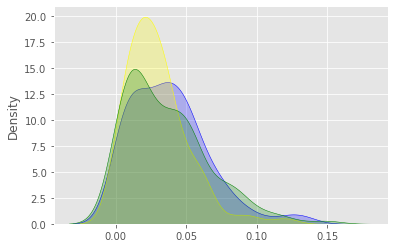

In [ ]:
sns.kdeplot(confidence_m_pos, shade=True, color='blue')
sns.kdeplot(confidence_n_pos, shade=True, color='yellow')
sns.kdeplot(confidence_f_pos, shade=True, color='green')

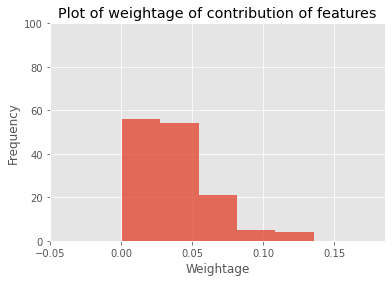

In [17]:
plt.ylim([0, 100])
plt.xlim([-0.05, max(confidence_m_pos)+0.05])
plt.hist(confidence_m_pos, bins=5, alpha=0.8)
plt.title(f'Plot of weightage of contribution of features')
plt.xlabel('Weightage')
plt.ylabel('Frequency')

plt.show()

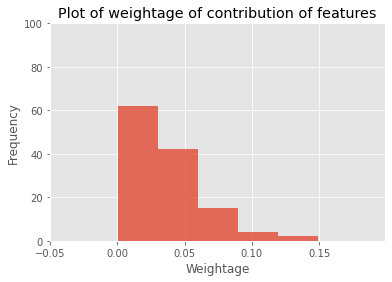

In [18]:
plt.ylim([0, 100])
plt.xlim([-0.05, max(confidence_f_pos)+0.05])
plt.hist(confidence_f_pos, bins=5, alpha=0.8)
plt.title(f'Plot of weightage of contribution of features')
plt.xlabel('Weightage')
plt.ylabel('Frequency')

plt.show()

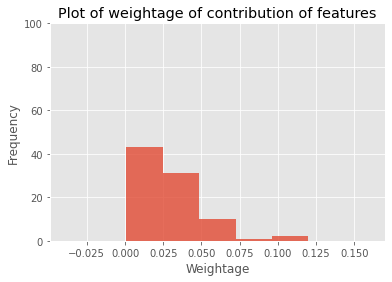

In [19]:
plt.ylim([0, 100])
plt.xlim([min(confidence_n_pos)-0.05, max(confidence_n_pos)+0.05])
plt.hist(confidence_n_pos, bins=5, alpha=0.8)
plt.title(f'Plot of weightage of contribution of features')
plt.xlabel('Weightage')
plt.ylabel('Frequency')

plt.show()

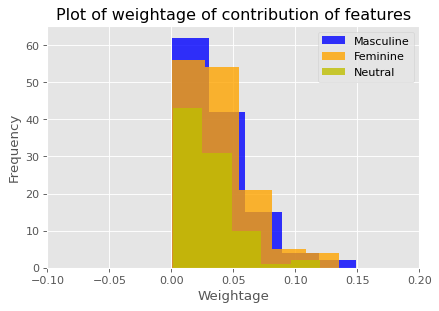

In [20]:
figure(figsize=(6, 4), dpi=80)

plt.xlim([-0.1, 0.2])
plt.hist(confidence_f_pos, bins=5, alpha=0.8, color='blue', label='Masculine')
plt.hist(confidence_m_pos, bins=5, alpha=0.8, color='orange', label='Feminine')
plt.hist(confidence_n_pos, bins=5, alpha=0.8, color='y', label='Neutral')

plt.legend(loc="best")

plt.title(f'Plot of weightage of contribution of features')
plt.xlabel('Weightage')
plt.ylabel('Frequency')

plt.show()

In [ ]:
figure(figsize=(10, 6), dpi=80)

#sns.set_style("darkgrid")
x=np.arange(0, 280, 1)
plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
#plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

#plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()


print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
#plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
import math
diff_f_m=[confidence_f_pos[i]-confidence_m_pos[i] for i in range(280) if abs(confidence_f_pos[i]-confidence_m_pos[i])>=0.1]
diff_f_n=[confidence_f_pos[i]-confidence_n_pos[i] for i in range(280) if abs(confidence_f_pos[i]-confidence_n_pos[i])>=0.1]
diff_m_n=[confidence_m_pos[i]-confidence_n_pos[i] for i in range(280) if abs(confidence_m_pos[i]-confidence_n_pos[i])>=0.1]

#diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
#diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

15
26
33


In [ ]:
import math
diff_f_m=[confidence_f_pos[i]-confidence_m_pos[i] for i in range(280) if abs(confidence_f_pos[i]-confidence_m_pos[i])>=0.05]
diff_f_n=[confidence_f_pos[i]-confidence_n_pos[i] for i in range(280) if abs(confidence_f_pos[i]-confidence_n_pos[i])>=0.05]
diff_m_n=[confidence_m_pos[i]-confidence_n_pos[i] for i in range(280) if abs(confidence_m_pos[i]-confidence_n_pos[i])>=0.05]

#diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
#diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

diff_f_m=[confidence_f_pos[i]-confidence_m_pos[i] for i in range(280)]
diff_m_n=[confidence_n_pos[i]-confidence_m_pos[i] for i in range(280)]
diff_f_n=[confidence_f_pos[i]-confidence_n_pos[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

74
124
120
280
280
280


In [ ]:
figure(figsize=(25, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='green')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='yellow')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, 280, 1)

plt.scatter(x, confidence_f_neg, alpha=1.0, color='red')
plt.scatter(x, confidence_m_neg, alpha=1.0, color='blue')
plt.scatter(x, confidence_n_neg, alpha=1.0, color='green')
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
#plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
#plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
#plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples, Difference=0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples for a difference of 0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, len(diff_f_m), 1)

plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_f_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_f_n, "b")
plt.scatter(x, diff_f_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_m_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_m_n, "b")
plt.scatter(x, diff_m_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [ ]:
from scipy.stats import ks_2samp
import numpy as np

print(ks_2samp(confidence_f_neg, confidence_m_neg))
print(ks_2samp(confidence_f_neg, confidence_n_neg))
print(ks_2samp(confidence_m_neg, confidence_n_neg))

#Model

In [ ]:
import torch
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader

twitter=pd.read_csv('Twitter_Data.csv')
#reddit=pd.read_csv('Reddit_Data.csv')
train=[]
train=list(twitter['clean_text'])
#for i in reddit['clean_comment']:
#  train.append(str(i))
labels=[]
labels=list(twitter['category'])
#for i in reddit['category']:
#  labels.append(i)


from string import punctuation
punctuation+="“"
punctuation+="”"
print(punctuation)

print(punctuation)
print(train[0])
all_text=""
# get rid of punctuation
for i in range(len(train)):
  train[i]=str(train[i]).lower()
  train[i]=''.join([c for c in train[i] if c not in punctuation])
  all_text+=train[i]+" "

words = all_text.split()

from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab = ['unk']+vocab
print(vocab)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in train:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
  
import numpy as np
encoded_labels = np.array([i+1 for i in labels])
print(encoded_labels[:10])

review_lens = Counter([len(x) for x in reviews_ints])

print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

seq_length = 200
features = pad_features(reviews_ints, seq_length=seq_length)

FileNotFoundError: ignored

In [ ]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 10

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,  drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,  drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,  drop_last=True)

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

In [ ]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sof = nn.Softmax()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sof_out = self.sof(out)
        
        # return last sigmoid output and hidden state
        return sof_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

model = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(model)
model.load_state_dict(torch.load('Model'))
device = torch.device('cuda:0')
model = model.to(device)

In [ ]:
# loss and optimization functions
"""
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epochs = 2 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    model.cuda()

model.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.long())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.long())
                val_losses.append(val_loss.item())

            model.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))"""

In [ ]:
#torch.save(model.state_dict(), 'Model')

In [ ]:
from string import punctuation

def tokenize_(test):
    #print(test)
    test= test.lower() # lowercase
    # get rid of punctuation
    txt = ''.join([c for c in test if c not in punctuation])

    # splitting by spaces
    testwords = txt.split()

    # tokens
    conv_int = []
    conv_int.append([vocab_to_int.get(word, 0) for word in testwords])

    return conv_int
sample = 'This is the worst movie I have seen, and the acting was terrible.'
output_ints = tokenize_(sample)
#print(output_ints)
features = pad_features(output_ints, seq_length)
feature_tensor = torch.from_numpy(features)

def predict(test_, sequence_length=200):
    model.eval()
    # tokenize review
    op = tokenize_(test_)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(op, seq_length)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = model.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = model(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding:', output)
    
    # print custom response
    pred_=torch.argmax(output)
    """if(pred_==0):
      print("It is a negative review")
    if(pred_==1):
      print("It is a neutral review")
    if(pred_==2):
      print("It is a positive review")"""
    return output.detach().cpu().numpy()

In [ ]:
sent=""
probs=predict(sent, seq_length)

#Explanations

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [ ]:
def predict_text(text):
  global num_
  outputs_=[]
  text=[i if len(i.strip())>1 else 'unk' for i in text]
  num_=len(text)
  #print(num_)
  for i in text:
    #print("Sentence", i)
    outputs_+=(predict(i).tolist())
  outputs_=np.array(outputs_)
  #print(outputs_)
  return outputs_


In [ ]:
num_=5
explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
#exp = explainer.explain_instance(train[0], c.predict_proba, num_features=8)
explanation = explainer.explain_instance(sentences[0], predict_text, num_features=10, num_samples=100, top_labels=3, distance_metric='cosine')
explanation.show_in_notebook(text=True, predict_proba=False)

In [ ]:
avg_f=0
avg_m=0
confidence_m=[]
confidence_f=[]
for i in range(len(m)):
  explanation = explainer.explain_instance(m[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in masculine):
      avg_m+=float(item[1])
      confidence_m.append(float(item[1]))
print()
print()
for i in range(len(fe)):
  explanation = explainer.explain_instance(fe[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in feminine):
      avg_f+=float(item[1])
      confidence_f.append(float(item[1]))

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_m)-0.1, max(confidence_m)+0.1])
plt.hist(confidence_m, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')

plt.xlim([min(confidence_f)-0.1, max(confidence_f)+0.1])
plt.hist(confidence_f, bins=5, alpha=0.5)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

In [ ]:
#Across all samples
#-0.8434138564014332
#-1.0710358969443534
print(avg_m)
print(avg_f)